# Atividade 1 - Aprendizado de M√°quina: modelos descritivos

**Professor: S√©rgio Nery Sim√µes**\
**Alunos:**
- Sandro Ricardo De Souza
- Leonardo Cruz de Andrade

**Data:26/03/2025**

A atividade consiste em replicar o notebooks neste [link](https://colab.research.google.com/drive/1vFRy6g0JPImsri8pItFqXypIU41uI-Bn#scrollTo=8XYcBbN3eI4v), executando cada c√©lula, interpretando e explicando cada sa√≠da. Concluir sugerindo aplica√ß√µes das metodologias aplicadas aqui na Secretaria de Educa√ß√£o do Esp√≠rito Santo.  



# Modelo de segmenta√ß√£o de clientes

Este notebook cont√©m um exerc√≠cio de clustering usado para praticar a interpreta√ß√£o de modelos de dados agrupados. A parte mais dif√≠cil de criar um modelo de clustering geralmente √© entender os resultados que ele produz, pois n√£o se tem uma vari√°vel de destino com a qual possa comparar seus resultados.

Portanto, a interpreta√ß√£o pode se tornar bastante complexa e, portanto, exploramos algumas alternativas para entender seus clusters depois de treinar seu modelo. Abaixo est√£o as etapas executadas para limpar os dados, explor√°-los e, finalmente, ajust√°-los a um modelo de agrupamento K-Means e interpretar os resultados.

A parte mais importante deste exerc√≠cio √© a interpreta√ß√£o do agrupamento, pois devemos estar cientes de que o objetivo final √© fornecer insights de neg√≥cios por meio dos resultados.

## Importando m√≥dulos

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Lendo base de dados

In [106]:
path_file = r'../../datasets/segmentation_data.csv'
customer_info = pd.read_csv(path_file)
customer_info.sample(5)

ID  Sex  Marital status  Age  Education  Income  Occupation  \
1987  100001988    0               0   25          0   66628           0   
1837  100001838    1               1   24          1  109486           1   
1432  100001433    1               0   70          3   69915           0   
272   100000273    0               0   36          1  244541           2   
249   100000250    1               1   22          1   88800           1   

      Settlement size  
1987                0  
1837                0  
1432                0  
272                 2  
249                 2

In [107]:
# # Alternativa 1
# import kagglehub
# # Download latest version
# path = kagglehub.dataset_download("dev0914sharma/customer-clustering")
# print("Path to dataset files:", path)
#customer_info = pd.read_csv(path + r'/segmentation data.csv')

# # Alternativa 2
customer_info = pd.read_csv('../../datasets/segmentation_data.csv')
customer_info.sample(5)

ID  Sex  Marital status  Age  Education  Income  Occupation  \
1488  100001489    1               1   20          1  115445           1   
1342  100001343    1               1   25          1  112785           1   
740   100000741    0               0   32          0  121347           1   
911   100000912    1               1   25          1  111502           0   
62    100000063    0               0   61          2  166410           2   

      Settlement size  
1488                1  
1342                1  
740                 1  
911                 0  
62                  1

In [108]:
customer_info.shape

(2000, 8)

## Dicion√°rio de dados

| Variable | Data Type | Range | Description |
| --- | --- | --- | --- |
| ID | numerical | Integer | Shows a unique identificator of a customer. |
| Sex | categorical | {0,1} | Biological sex (gender) of a customer. 0 = male / 1 = female |
| Marital status | categorical | {0,1} | Marital status of a customer. 0 = single / 1 = non-single |
| Age | numerical | Integer | The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset (Min. age = 18 / Max. age = 78) |
| Education | categorical | {0,1,2,3} | Level of education of the customer. 0=no education / 1=high-school / 2=university / 3=graduate |
| Income | numerical | Real | Self-reported annual income in US dollars of the customer. |
| Occupation | categorical | {0,1,2} | Category of occupation of the customer. 0=unemployed / 1=employee/oficial / 2=management or self-employed |
| Settlement size | categorical | {0,1,2} | The size of the city that the customer lives in. 0=small / 1=mid-size / 2=big |

O dataset cont√©m 2.000 registros e 8 colunas, sem valores nulos.

**Vari√°veis Num√©ricas:**
- ID (identificador √∫nico).
- Age (idade).
- Income (renda anual).

**Vari√°veis Categ√≥ricas:**
- Sex (0 = masculino, 1 = feminino).
- Marital status (0 = solteiro, 1 = casado/n√£o solteiro).
- Education (0 = sem educa√ß√£o, 1 = ensino m√©dio, 2 = universidade, 3 = p√≥s-gradua√ß√£o).
- Occupation (0 = desempregado, 1 = empregado, 2 = gerente/aut√¥nomo).
- Settlement size (0 = cidade pequena, 1 = m√©dia, 2 = grande).

## Informa√ß√µes sobre o dataset

An√°lise estat√≠stica resumida dos dados. Verifica√ß√£o de valores nulos e estrutura geral dos dados, incluindo os tipos.

O m√©todo `.info()` para entender os tipos de dados em cada coluna. E o m√©todo `.describe()` para mostrar informa√ß√µes resumidas sobre as estat√≠sticas regulares.

In [109]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [110]:
customer_info.describe()

ID          Sex  Marital status          Age   Education  \
count  2.000000e+03  2000.000000     2000.000000  2000.000000  2000.00000   
mean   1.000010e+08     0.457000        0.496500    35.909000     1.03800   
std    5.774946e+02     0.498272        0.500113    11.719402     0.59978   
min    1.000000e+08     0.000000        0.000000    18.000000     0.00000   
25%    1.000005e+08     0.000000        0.000000    27.000000     1.00000   
50%    1.000010e+08     0.000000        0.000000    33.000000     1.00000   
75%    1.000015e+08     1.000000        1.000000    42.000000     1.00000   
max    1.000020e+08     1.000000        1.000000    76.000000     3.00000   

              Income   Occupation  Settlement size  
count    2000.000000  2000.000000      2000.000000  
mean   120954.419000     0.810500         0.739000  
std     38108.824679     0.638587         0.812533  
min     35832.000000     0.000000         0.000000  
25%     97663.250000     0.000000         0.000000  
50%    115548.500000     1.000000         1.000000  
75%    138072.250000     1.000000         1.000000  
max    309364.000000     2.000000         2.000000

Melhorando a apresenta√ß√£o do `.describe`

In [111]:
num_columns = ['ID','Age','Income']
cat_columns = ['Sex','Marital status','Education','Occupation','Settlement size']
customer_info[cat_columns] = customer_info[cat_columns].astype('str')
customer_info.describe(include='object').T

count unique top  freq
Sex              2000      2   0  1086
Marital status   2000      2   0  1007
Education        2000      4   1  1386
Occupation       2000      3   1  1113
Settlement size  2000      3   0   989

Na c√©lua anterior, melhoramos a sa√≠da do describe para obtermos uma descri√ß√£o mais acertiva. 

`num_columns = ['ID','Age','Income']`

criamos uma lista chamada num_columns contendo os nomes das colunas num√©ricas da base de dados. Essas colunas s√£o:

- ID: identificador √∫nico do cliente (inteiro).
- Age: idade do cliente (inteiro).
- Income: renda anual do cliente (real).

`cat_columns = ['Sex','Marital status','Education','Occupation','Settlement size']`

criamos uma lista chamada `cat_columns` contendo os nomes das colunas categ√≥ricas. Essas colunas representam caracter√≠sticas como sexo, estado civil, n√≠vel de educa√ß√£o, ocupa√ß√£o e tamanho da cidade.

`customer_info[cat_columns] = customer_info[cat_columns].astype('str')`

Convertemos todas as colunas categ√≥ricas para o tipo string. Isso facilita a an√°lise estat√≠stica com m√©todos como `.describe()`, pois o pandas trata strings como categorias de texto.

`customer_info.describe(include='object').T`

O m√©todo `.describe(include='object')` gera estat√≠sticas descritivas apenas para colunas categ√≥ricas (strings). Ele retorna informa√ß√µes como:
- count: n√∫mero de valores n√£o nulos.
- unique: quantidade de categorias distintas.
- top: categoria mais frequente.
- freq: frequ√™ncia da categoria mais comum.

Por fim, o `.T` (transposi√ß√£o) inverte linhas e colunas para uma visualiza√ß√£o mais organizada.

## Valores faltantes

Podemos ver, pela sa√≠da do comando `.info()` que n√£o h√° valores faltantes nos dados.

## An√°lise explorat√≥ria de dados

### Distribui√ß√£o das vari√°veis num√©ricas

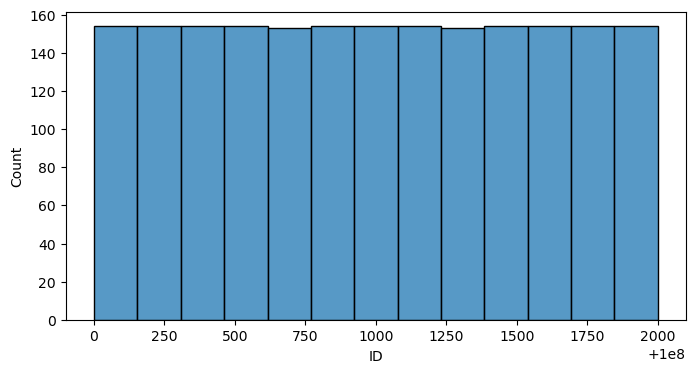

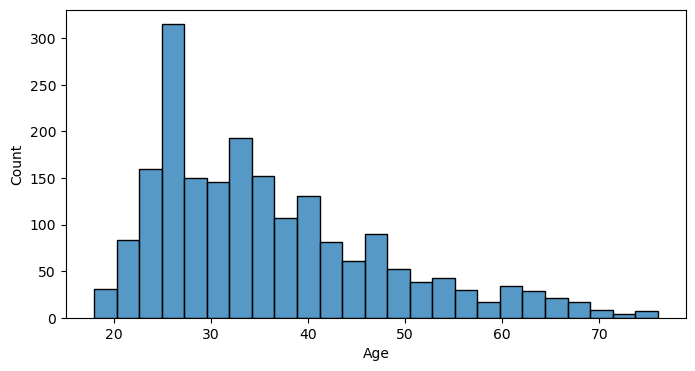

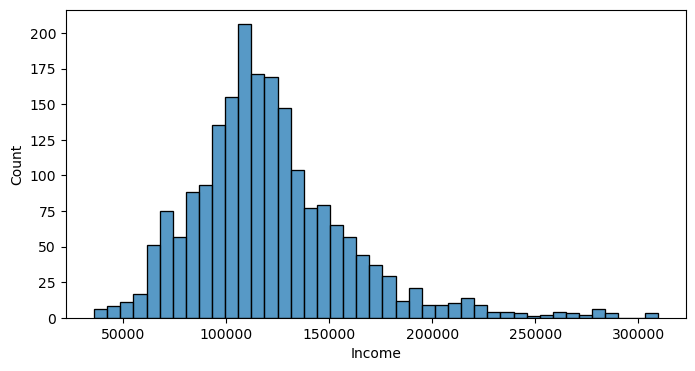

In [112]:
for numerical in num_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(data=customer_info, x=numerical)

### Distribui√ß√£o das vari√°veis num√©ricas Idade, ID e Renda.

Notamos que `ID` tem uma distribui√ß√£o uniforme, o que faz sentido, j√° que √© um identificador do cliente e ser√° descartado abaixo.
A vari√°vel `Idade` tem uma forte assimetria √† direita, gerada por causa do limite inferior em zero da vari√°vel. Se estivermos usando o agrupamento K-Means, n√£o haver√° necessidade de normalizar o atributo, mas talvez tenhamos que fazer isso para outros modelos. A vari√°vel `Renda` tem o mesmo problema de assimetria √† direita que 'Idade'. Teremos que ter cuidado com isso, dependendo do modelo que selecionarmos.

### Distribui√ß√£o das vari√°veis categ√≥ricas

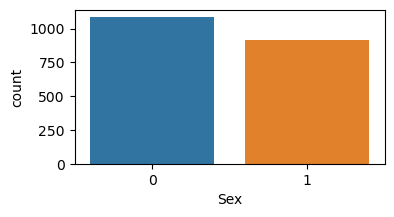

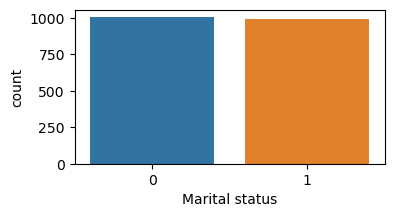

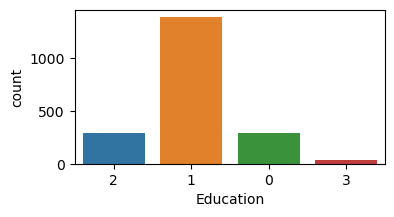

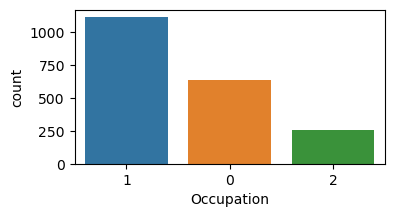

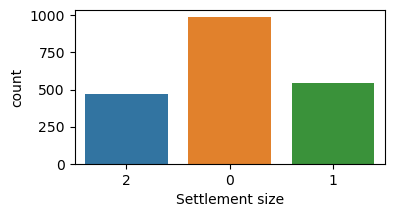

In [113]:
for category in cat_columns:
    plt.figure(figsize=(4,2))
    sns.countplot(data=customer_info, x=category, hue=category)

A an√°lise das vari√°veis categ√≥ricas revelou que os g√™neros e o estado civil dos clientes est√£o equilibrados. A maioria possui ensino m√©dio, enquanto apenas 1,8% tem p√≥s-gradua√ß√£o, sugerindo a fus√£o das categorias superiores em "universidade". Al√©m disso, as categorias de ocupa√ß√£o e tamanho do assentamento apresentam uma distribui√ß√£o adequada entre as op√ß√µes.

### An√°lise bivariada
Uma an√°lise bivariada √© um tipo de an√°lise estat√≠stica que examina a rela√ß√£o entre duas vari√°veis. O objetivo √© entender se existe associa√ß√£o entre elas e como elas se comportam juntas. Dependendo do tipo de vari√°veis envolvidas (categ√≥ricas ou num√©ricas), diferentes t√©cnicas podem ser utilizadas.

#### Caracter√≠sticas num√©ricas

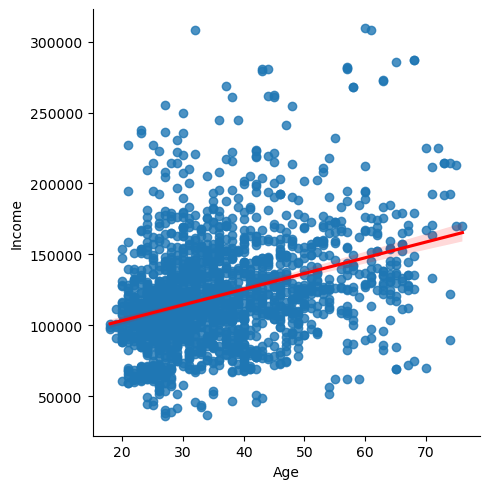

In [114]:
sns.lmplot(x='Age', y='Income',  line_kws={'color': 'red'},  data=customer_info)

H√° uma pequena correla√ß√£o entre as caracter√≠sticas Idade e Renda. Percebemos que a inclina√ß√£o da linha √© muito pequena, o que mostra que a correla√ß√£o entre as caracter√≠sticas √© baixa.

In [115]:
import scipy.stats as stats
print(stats.pearsonr(customer_info['Age'], customer_info['Income']))

PearsonRResult(statistic=0.3406101637317351, pvalue=1.6443825442386297e-55)


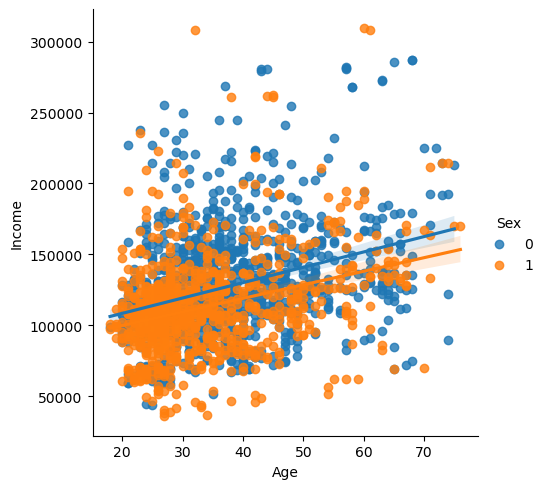

In [116]:
sns.lmplot(x='Age', y='Income', hue='Sex', data=customer_info)

Podemos ver o c√°lculo do fator de correla√ß√£o de Pearson, que mostra que os valores t√™m uma pequena correla√ß√£o entre eles. Plotando os dados segmentados por g√™nero, a correla√ß√£o se mantem para ambos

#### Compara√ß√£o entre vari√°veis categ√≥ricas e num√©ricas

In [117]:
cat_columns

['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']

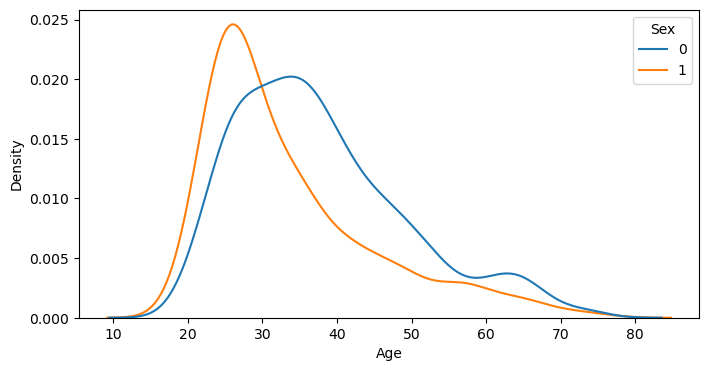

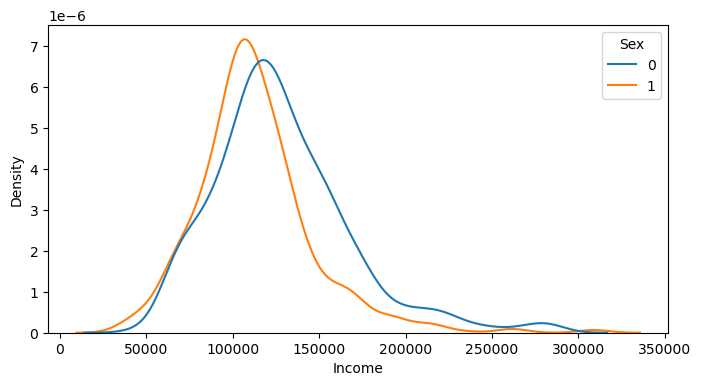

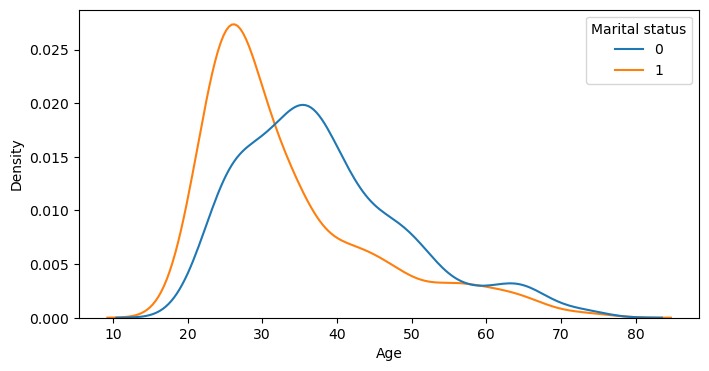

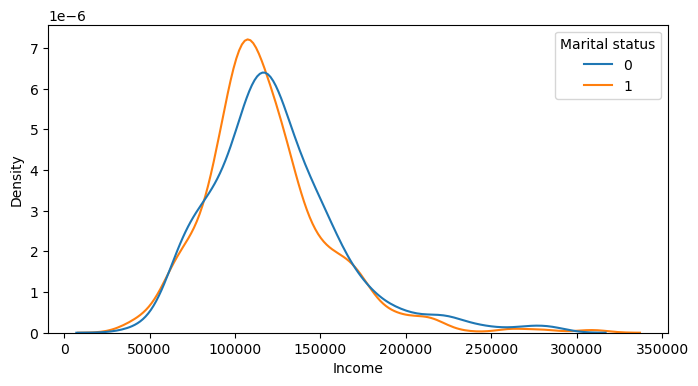

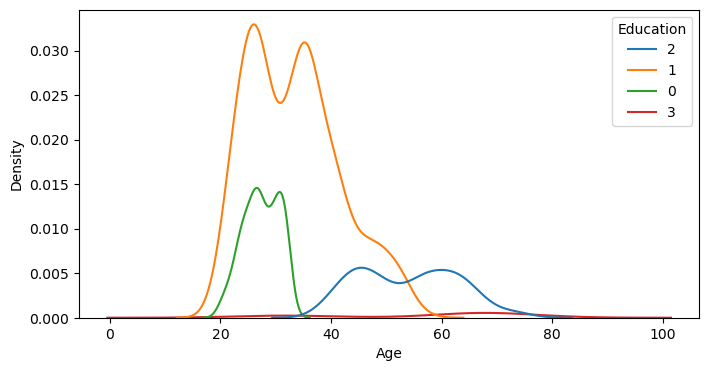

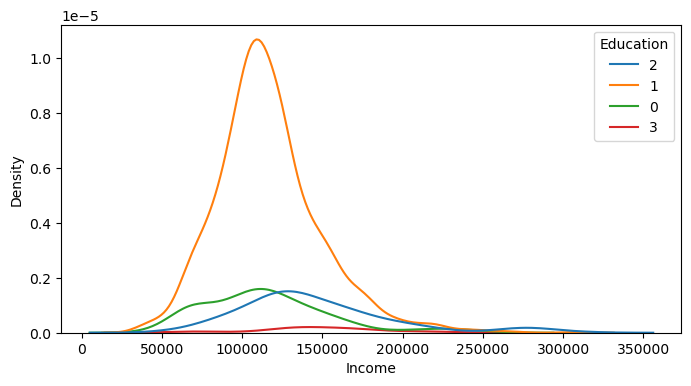

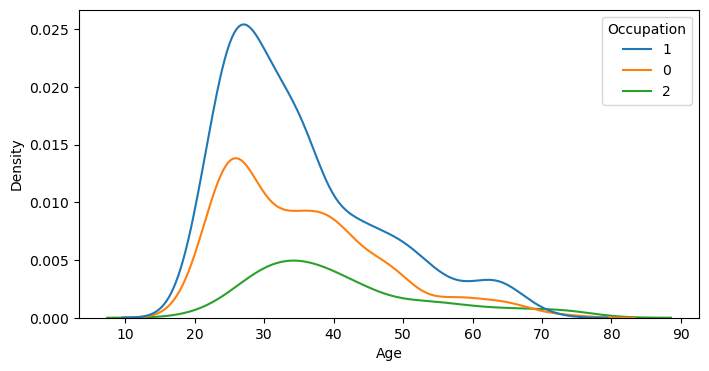

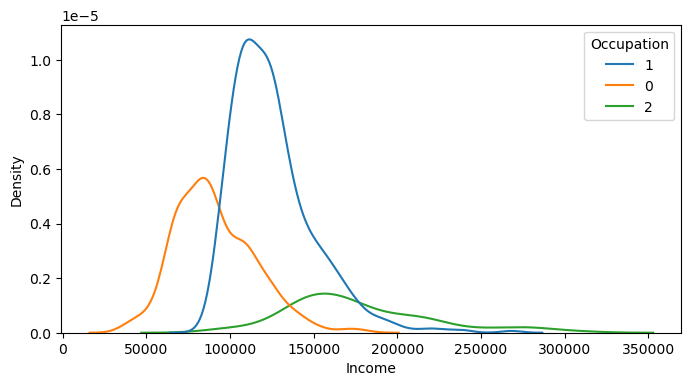

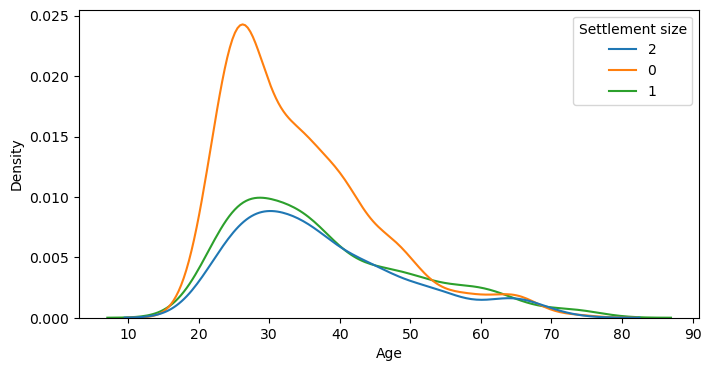

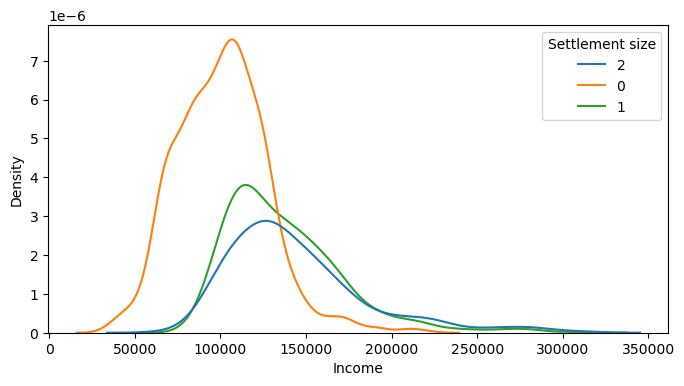

In [118]:
for category in cat_columns:
    for numerical in num_columns:
        if numerical != 'ID':
            plt.figure(figsize=(8,4))
            sns.kdeplot(data=customer_info, x=numerical, hue=category) ## Non-normalized version of this plot by switching kdeplot for histplot

#### An√°lise dos gr√°ficos de densidade
Os gr√°ficos de densidade revelam algumas tend√™ncias importantes

1. Idade por categoria:
   - Pessoas casadas tendem a ser mais velhas do que as solteiras.
   - O n√≠vel educacional apresenta uma varia√ß√£o interessante com a idade: pessoas com maior educa√ß√£o tendem a estar em faixas et√°rias intermedi√°rias.
   - Desempregados (ocupa√ß√£o = 0) tendem a estar distribu√≠dos em faixas et√°rias mais altas e mais baixas, possivelmente jovens sem emprego fixo e aposentados.
2. Renda por categoria:
   - Homens parecem ter uma distribui√ß√£o de renda mais elevada em rela√ß√£o √†s mulheres.
   - Pessoas casadas possuem uma distribui√ß√£o de renda mais ampla, indicando maior varia√ß√£o.
   - O n√≠vel educacional tem uma forte correla√ß√£o com a renda: n√≠veis mais altos de educa√ß√£o tendem a gerar maior renda.
   - A ocupa√ß√£o impacta fortemente a renda, com os desempregados concentrados em faixas de menor rendimento.

#### Rela√ß√£o entre vari√°veis categ√≥ricas

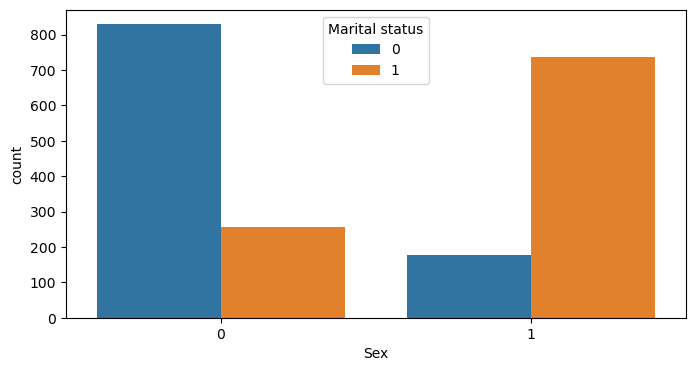

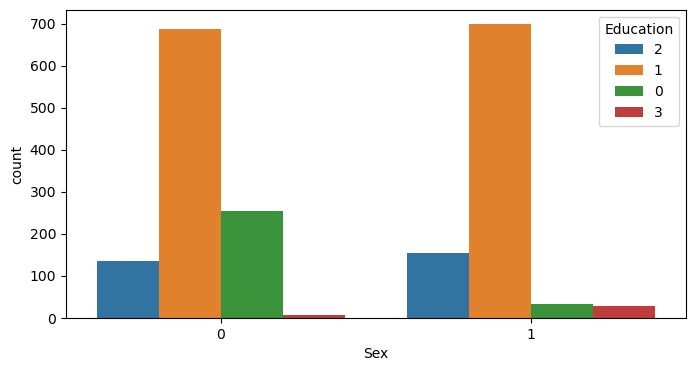

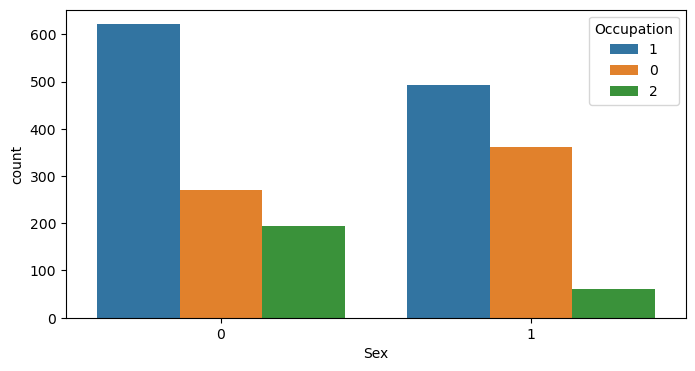

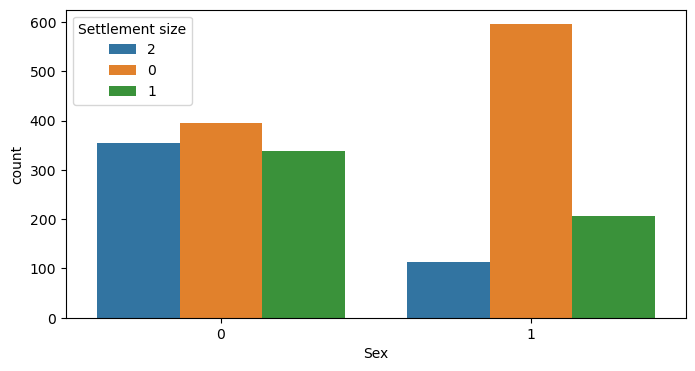

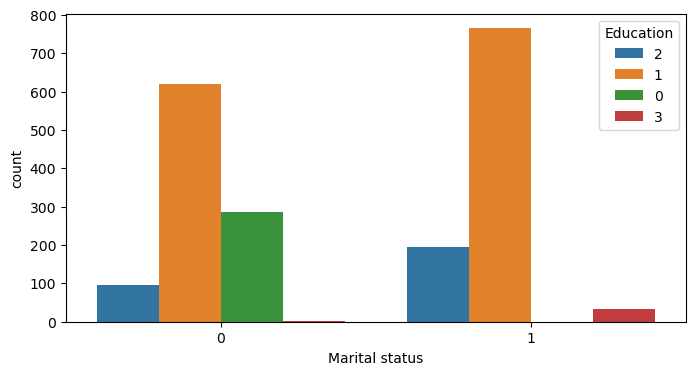

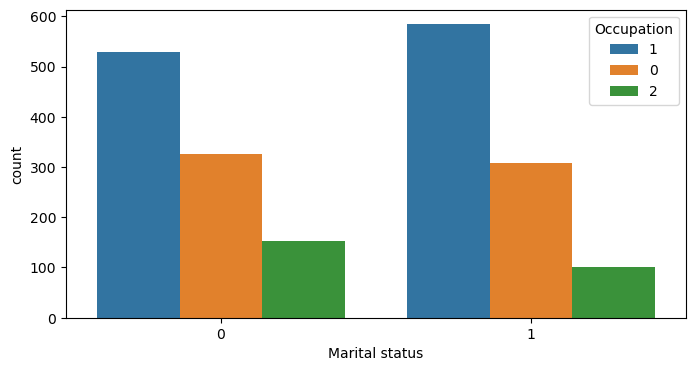

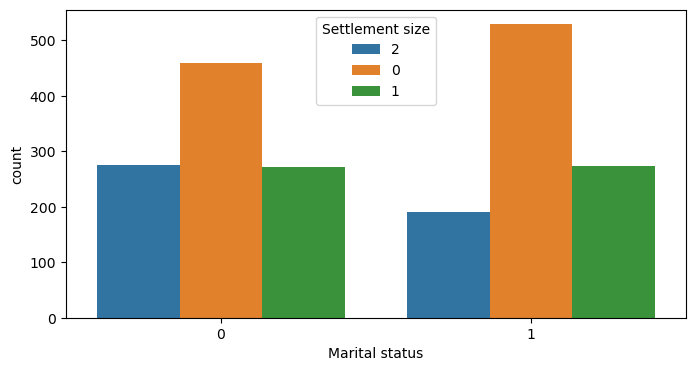

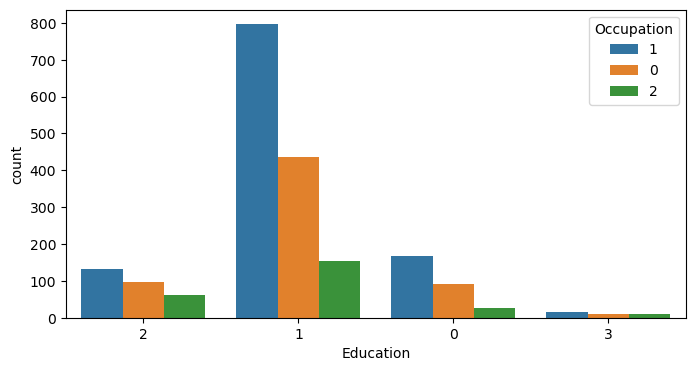

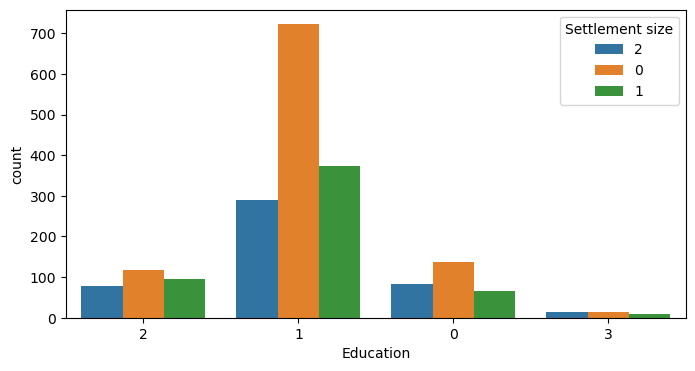

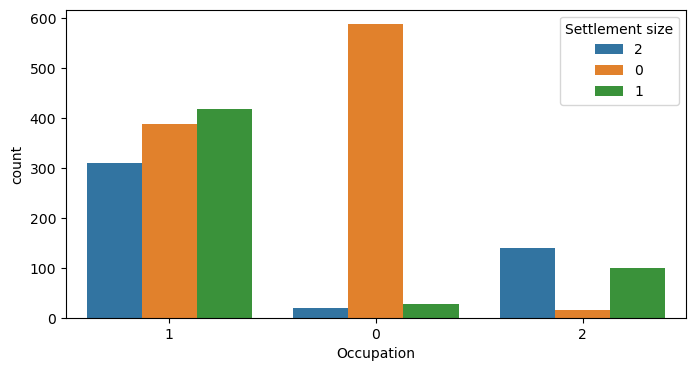

In [119]:
cat_aux = cat_columns.copy()
for category1 in cat_columns:
    cat_aux.pop(0);
    for category2 in cat_aux:
        if category1 != category2:
            plt.figure(figsize=(8,4))
            sns.countplot(data=customer_info, x=category1, hue=category2)

#### An√°lise dos gr√°ficos de barra 
Os gr√°ficos de contagem mostram algumas rela√ß√µes interessantes entre vari√°veis categ√≥ricas:

1. Sexo e Estado Civil:
    - Mulheres tendem a ser casadas com mais frequ√™ncia do que homens.
    - Homens aparecem mais frequentemente na categoria de solteiros.
2. Estado Civil e Educa√ß√£o:
    - Pessoas casadas possuem uma maior concentra√ß√£o nos n√≠veis m√©dio e superior de educa√ß√£o.
3. Estado Civil e Tamanho da Cidade:
    - Pessoas casadas s√£o mais comuns em cidades menores, enquanto solteiros s√£o mais frequentes em √°reas urbanas maiores.
4. Ocupa√ß√£o e Sexo:
    - Homens tendem a ser empregados com mais frequ√™ncia do que mulheres.
    - Mulheres possuem uma maior propor√ß√£o de desempregadas em compara√ß√£o aos homens.

### An√°lise Multivariada
A an√°lise multivariada √© um conjunto de t√©cnicas estat√≠sticas utilizadas para examinar simultaneamente m√∫ltiplas vari√°veis e suas rela√ß√µes. Diferente da an√°lise univariada, que estuda cada vari√°vel isoladamente, e da an√°lise bivariada, que avalia a rela√ß√£o entre duas vari√°veis, a an√°lise multivariada busca entender padr√µes mais complexos, considerando a intera√ß√£o entre tr√™s ou mais vari√°veis ao mesmo tempo.

In [120]:
def bivariate_scatter(x, y, hue, df):
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=x, y=y, data=df, hue=hue, alpha=0.85)

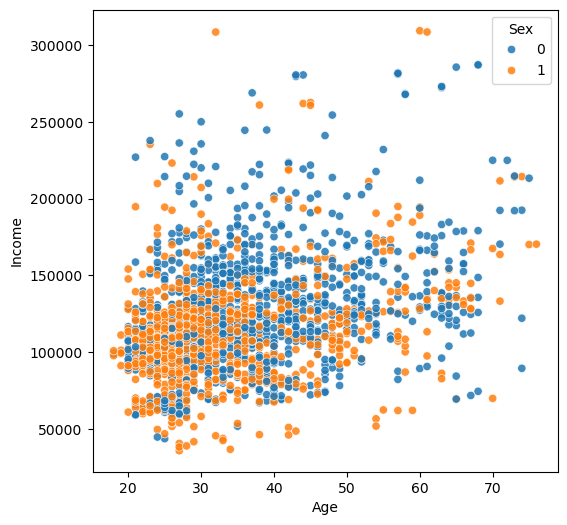

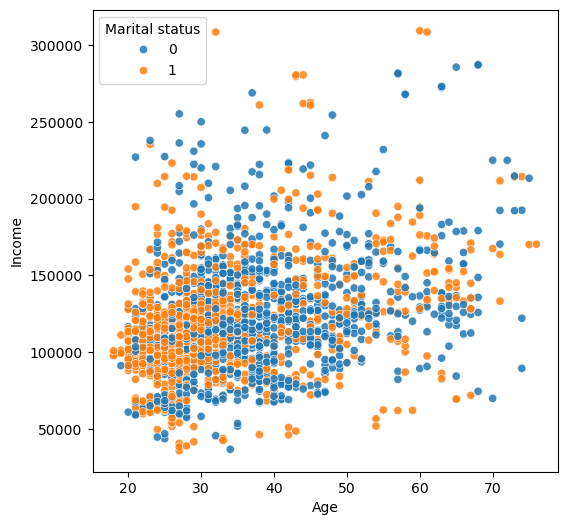

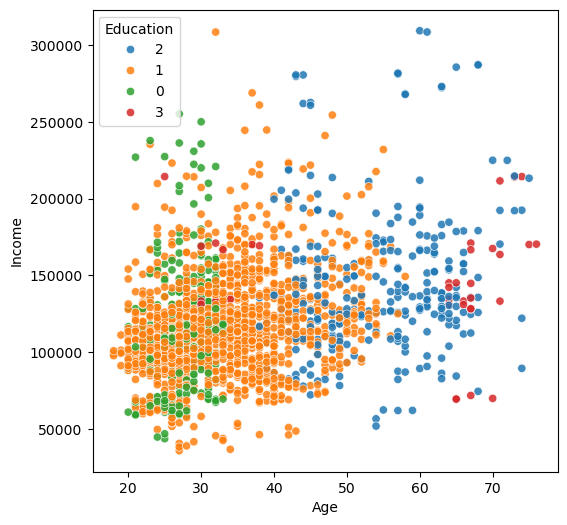

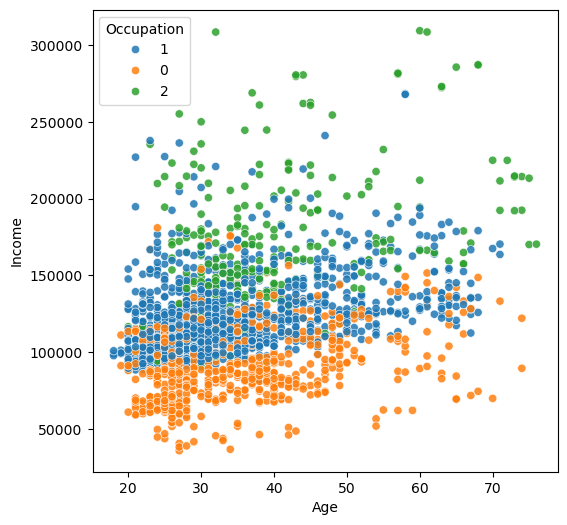

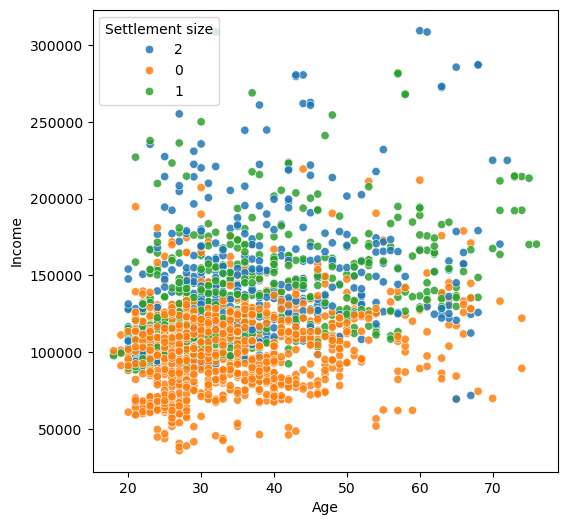

In [121]:
for cat in cat_columns:
    bivariate_scatter('Age', 'Income', cat, customer_info)

#### An√°lise dos Gr√°ficos de Dispers√£o (Multivariada)
Os gr√°ficos mostram a rela√ß√£o entre Idade e Renda, segmentada por diferentes vari√°veis categ√≥ricas:

1. Sexo:
   - N√£o h√° uma diferen√ßa significativa na distribui√ß√£o de renda entre homens e mulheres.
   - Parece haver uma maior dispers√£o nos dados para ambos os sexos, indicando que a renda n√£o depende fortemente do g√™nero.
2. Estado Civil:
    - Pessoas casadas parecem ter uma renda um pouco mais distribu√≠da em faixas mais altas em rela√ß√£o aos solteiros.
    - Pode indicar que o casamento est√° correlacionado com maior estabilidade financeira.
3. Educa√ß√£o:
   - N√≠veis educacionais mais altos tendem a estar associados a maiores rendas.
   - H√° uma maior concentra√ß√£o de pessoas com menor renda nos n√≠veis de educa√ß√£o mais baixos.
4. Ocupa√ß√£o:
   - Pessoas desempregadas tendem a ter uma renda mais baixa, conforme esperado.
   - A rela√ß√£o entre idade e renda √© mais evidente para pessoas empregadas.
5. Tamanho do Assentamento (Cidade):
   - Pessoas que vivem em cidades maiores parecem ter uma maior distribui√ß√£o de renda.
   - Em cidades pequenas, a renda est√° mais concentrada em faixas mais baixas.

### Conclus√£o da An√°lise Bivariada e Multivarida

A an√°lise dos dados revelou diversos padr√µes e rela√ß√µes entre as vari√°veis investigadas. A partir da **an√°lise bivariada**, observou-se uma leve predomin√¢ncia masculina na amostra e uma distribui√ß√£o equilibrada entre casados e n√£o casados. Al√©m disso, verificou-se que a maioria dos clientes vive em cidades pequenas e est√° empregada. A educa√ß√£o apresentou influ√™ncia significativa, sendo que poucos clientes possuem p√≥s-gradua√ß√£o, o que sugere a possibilidade de agrupar categorias educacionais superiores. Al√©m disso, constatou-se que indiv√≠duos desempregados tendem a residir em cidades menores, e que h√° um poss√≠vel vi√©s de g√™nero, pois homens s√£o empregados com maior frequ√™ncia, enquanto mulheres s√£o mais frequentemente desempregadas.  

J√° na **an√°lise multivariada**, explorando a rela√ß√£o entre idade e renda segmentada por vari√°veis categ√≥ricas, foi poss√≠vel verificar que a educa√ß√£o e a ocupa√ß√£o s√£o os fatores mais determinantes para a renda. Pessoas com maior escolaridade tendem a apresentar rendas mais elevadas, e a rela√ß√£o entre idade e renda se torna mais evidente para indiv√≠duos empregados. O estado civil tamb√©m se mostrou relevante, pois indiv√≠duos casados possuem maior distribui√ß√£o de renda em faixas superiores, o que pode indicar uma associa√ß√£o com maior estabilidade financeira. O tamanho do assentamento refor√ßou a influ√™ncia no acesso a oportunidades, j√° que moradores de cidades grandes possuem uma distribui√ß√£o de renda mais ampla, enquanto aqueles que vivem em cidades menores apresentam maior concentra√ß√£o de rendas baixas.  

Em s√≠ntese, enquanto a an√°lise bivariada destacou padr√µes gerais de distribui√ß√£o demogr√°fica, emprego e educa√ß√£o, a an√°lise multivariada aprofundou a compreens√£o sobre os determinantes da renda e as intera√ß√µes entre idade, ocupa√ß√£o e estado civil. Os resultados indicam que fatores socioecon√¥micos e geogr√°ficos desempenham um papel fundamental na segmenta√ß√£o dos clientes e suas condi√ß√µes financeiras.

### Transforma√ß√£o e dimensionamento de atributos

#### Teste de normalidade para os dados

Os atributos num√©ricos mostraram uma inclina√ß√£o √† direita em suas distribui√ß√µes. Verificaremos se os dados s√£o distribu√≠dos normalmente ou n√£o, usando um teste de normalidade do scipy. A partir de algumas visualiza√ß√µes anteriores, j√° podemos supor que os dados n√£o s√£o distribu√≠dos normalmente, mas executamos o teste para ter evid√™ncias disso precisamente.

In [122]:
normaltest_result_income = stats.normaltest(customer_info['Income'])[1]
normaltest_result_age    = stats.normaltest(customer_info['Age'])[1]

print(f'O valor p para a hip√≥tese nula de que a renda √© distribu√≠da normalmente √© {normaltest_result_income}')
print(f'O valor p para a hip√≥tese nula de que a idade √© distribu√≠da normalmente √© {normaltest_result_age}')

O valor p para a hip√≥tese nula de que a renda √© distribu√≠da normalmente √© 2.5009638879187734e-98
O valor p para a hip√≥tese nula de que a idade √© distribu√≠da normalmente √© 3.3428344870001586e-56


##### An√°lise do teste de normalidade

Os resultados do teste de normalidade indicam que tanto a vari√°vel Income (Renda) quanto Age (Idade) n√£o seguem uma distribui√ß√£o normal. Os valores de p-value obtidos foram extremamente baixos:

- Income: $2.5 \times 10^{-98}$ 
- Age: $3.34 \times 10^{-56}$

O crit√©rio usual para rejeitar a hip√≥tese nula ($H_0$), que assume que os dados seguem uma distribui√ß√£o normal, √© $\text{p-value} < 0.05$. Como os valores obtidos s√£o muito menores do que $0.05$, podemos rejeitar com extrema certeza a hip√≥tese de normalidade para ambas as vari√°veis.

##### Implica√ß√µes
Os dados n√£o seguem uma distribui√ß√£o normal ‚Äì Isso significa que estat√≠sticas como a m√©dia e o desvio padr√£o podem n√£o ser representativas, e testes estat√≠sticos que assumem normalidade podem n√£o ser apropriados.

Transforma√ß√£o dos dados ‚Äì Para utilizar modelos estat√≠sticos e de aprendizado de m√°quina que assumem normalidade, como K-Means Clustering, √© necess√°rio normalizar os dados antes de utiliz√°-los no modelo. T√©cnicas comuns incluem:

- Transforma√ß√£o logar√≠tmica (Log-Transform) para lidar com distribui√ß√µes enviesadas positivamente.
- Transforma√ß√£o de Box-Cox ou Yeo-Johnson, que s√£o m√©todos mais gerais para tornar os dados mais pr√≥ximos da normalidade.
- Padroniza√ß√£o (Z-score), que transforma os dados para terem m√©dia 0 e desvio padr√£o 1, facilitando a aplica√ß√£o de algoritmos de machine learning.

Dessa forma, antes de aplicar t√©cnicas como K-Means, √© fundamental realizar uma transforma√ß√£o nos dados e verificar novamente sua distribui√ß√£o para garantir que atendam aos requisitos do modelo.

#### Ciclo de transforma√ß√£o

Abaixo, examinaremos o mesmo ciclo repetidamente at√© atingirmos uma distribui√ß√£o razo√°vel o suficiente. Para isso, criamos uma fun√ß√£o que aplica uma transforma√ß√£o nos dados, ajustando seus par√¢metros e, em seguida, transformando cada valor em uma distribui√ß√£o mais recente. Testaremos um log e um PowerTransform, pois os dados parecem ter uma forte distor√ß√£o para a direita, especialmente o recurso Income.

### Atributo: Renda
#### Transforma√ß√£o de Log

In [123]:
def apply_log(column):
    return np.log(column)

def normality_test(column):
    return stats.normaltest(column)

Ap√≥s executar o teste, notamos que os dados ainda n√£o est√£o distribu√≠dos normalmente, ent√£o a transforma√ß√£o de log n√£o conseguiu lev√°-los a uma distribui√ß√£o normal completa. Agora testaremos o PowerTransformer do scikit learn para ver se alcan√ßamos melhores resultados.

#### PowerTransformer
√â uma fam√≠lia de transforma√ß√µes param√©tricas e monot√¥nicas que s√£o aplicadas para tornar os dados mais parecidos com Gaussianos. Isso √© √∫til para modelar problemas relacionados √† heterocedasticidade (vari√¢ncia n√£o constante) ou outras situa√ß√µes em que a normalidade √© desejada. Atualmente, o PowerTransformer suporta a transformada Box-Cox e a transformada Yeo-Johnson. O par√¢metro √≥timo para estabilizar a vari√¢ncia e minimizar a assimetria √© estimado por meio da m√°xima verossimilhan√ßa. O Box-Cox exige que os dados de entrada sejam estritamente positivos, enquanto o Yeo-Johnson aceita dados positivos ou negativos. Por padr√£o, a normaliza√ß√£o de m√©dia zero e vari√¢ncia unit√°ria √© aplicada aos dados transformados.

In [124]:
from sklearn.preprocessing import PowerTransformer

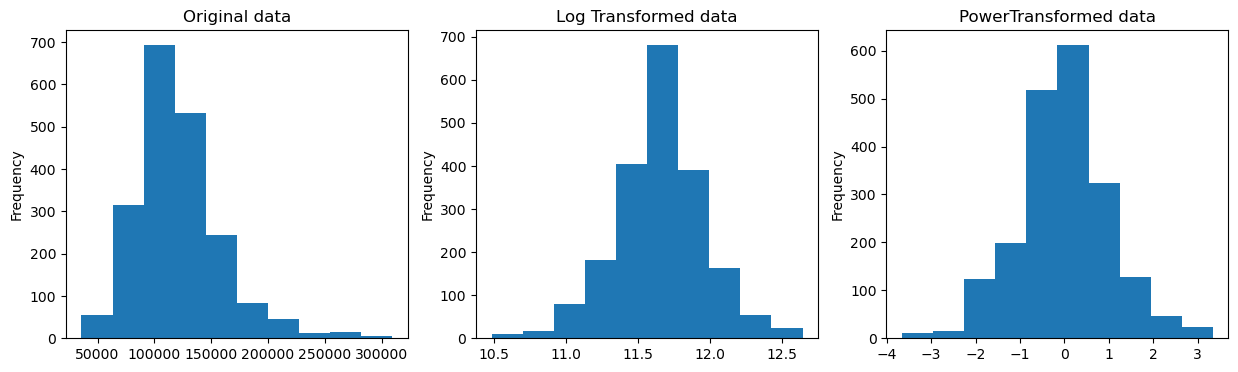

In [125]:
# PowerTransform data
feature = customer_info['Income'].to_numpy().reshape(-1,1)

powtr = PowerTransformer()
feature_transf = powtr.fit_transform(feature)
array_1d = feature_transf.flatten()
feature = pd.Series(data=array_1d, index=list(range(len(array_1d))))

# Log Transform data
log_transformed_income = apply_log(customer_info['Income'])

# Create axis for original data plot (ax1) and transformed data (ax2)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4));

# Plot original data & get metrics
customer_info['Income'].plot(kind='hist', ax=ax1)
ax1.title.set_text('Original data')
norm_test1 = normality_test(customer_info['Income'])

# Plot log transformed data & get metrics
log_transformed_income.plot(kind='hist', ax=ax2);
ax2.title.set_text('Log Transformed data')
norm_test2 = normality_test(log_transformed_income)

# Plot power transformed data & get metrics
feature.plot(kind='hist', ax=ax3);
ax3.title.set_text('PowerTransformed data')
norm_test3 = normality_test(feature)

# Create a DataFrame that shows normality test results for each tranformation
norm_results = [norm_test1, norm_test2, norm_test3]
metrics = pd.DataFrame(norm_results, index=['Original data', 'Log transform', 'PowerTransformer'])

In [126]:
normality_test(log_transformed_income)

NormaltestResult(statistic=32.357037046565246, pvalue=9.413663716187575e-08)

In [127]:
metrics

statistic        pvalue
Original data     449.473326  2.500964e-98
Log transform      32.357037  9.413664e-08
PowerTransformer   27.859212  8.921729e-07

O **PowerTransformer** √© uma t√©cnica de transforma√ß√£o que busca tornar os dados mais pr√≥ximos de uma distribui√ß√£o normal, estabilizando a vari√¢ncia e reduzindo a assimetria. Ele suporta duas abordagens: **Box-Cox**, que exige valores positivos, e **Yeo-Johnson**, que pode ser aplicado a qualquer conjunto de dados. Al√©m disso, a transforma√ß√£o ajusta os dados para m√©dia zero e vari√¢ncia unit√°ria, o que pode ser essencial para modelos que assumem normalidade, como **K-Means Clustering**.  

A an√°lise de normalidade dos dados de renda (**Income**) antes da transforma√ß√£o indicou uma forte **n√£o normalidade** ($\text{p-value} ‚âà 10^{-98}$), o que levou √† aplica√ß√£o de duas t√©cnicas: **transforma√ß√£o logar√≠tmica** e **PowerTransformer**. Ambas reduziram a assimetria e melhoraram a distribui√ß√£o, mas os testes de normalidade ainda retornaram valores de p muito baixos ($ ‚âà 10^{-8}$ para $\log$ e $10^{-7}$ para **PowerTransformer**), indicando que os dados ainda n√£o seguem perfeitamente uma distribui√ß√£o normal. Apesar da melhora, pode ser necess√°rio testar outras t√©cnicas, como **padroniza√ß√£o (Z-score)**, ou optar por m√©todos estat√≠sticos que n√£o exigem normalidade.

### Atributo: Age

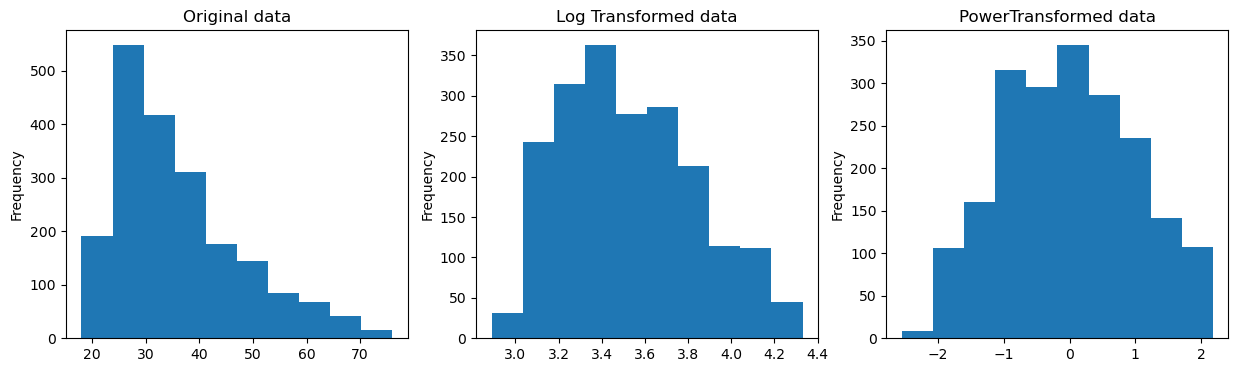

In [128]:
# PowerTransform data
feature2 = customer_info['Age'].to_numpy().reshape(-1,1)

powtr = PowerTransformer()
feature_transf = powtr.fit_transform(feature2)
array_1d = feature_transf.flatten()
feature2 = pd.Series(data=array_1d, index=list(range(len(array_1d))))

# Log Transform data
log_transformed_age = apply_log(customer_info['Age'])

# Create axis for original data plot (ax1) and transformed data (ax2)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4));

# Plot original data & get metrics
customer_info['Age'].plot(kind='hist', ax=ax1)
ax1.title.set_text('Original data')
norm_test1 = normality_test(customer_info['Age'])

# Plot log transformed data & get metrics
log_transformed_age.plot(kind='hist', ax=ax2);
ax2.title.set_text('Log Transformed data')
norm_test2 = normality_test(log_transformed_age)

# Plot power transformed data & get metrics
feature2.plot(kind='hist', ax=ax3);
ax3.title.set_text('PowerTransformed data')
norm_test3 = normality_test(feature2)

# Create a DataFrame that shows normality test results for each tranformation
norm_results = [norm_test1, norm_test2, norm_test3]
metrics = pd.DataFrame(norm_results, index=['Original data', 'Log transform', 'PowerTransformer'])

In [129]:
metrics

statistic        pvalue
Original data     255.475892  3.342834e-56
Log transform     111.094201  7.519703e-25
PowerTransformer  161.196197  9.924089e-36

A vari√°vel **Age** (idade) passou por um processo semelhante ao aplicado √† vari√°vel **Income**, com o objetivo de aproximar seus valores de uma distribui√ß√£o normal. Inicialmente, o teste de normalidade indicou uma forte **n√£o normalidade** ($p$-value $\approx 3.34 \times 10^{-56}$), confirmando que os dados n√£o seguem uma distribui√ß√£o normal. Para mitigar esse problema, foram aplicadas duas transforma√ß√µes: **logar√≠tmica** e **PowerTransformer**.  

Os resultados mostram que ambas as transforma√ß√µes reduziram a estat√≠stica de teste, indicando uma melhora na distribui√ß√£o, mas os $p$-values ainda permanecem extremamente baixos ($7.52 \times 10^{-25}$ para log e $9.92 \times 10^{-36}$ para PowerTransformer). Isso sugere que, embora as transforma√ß√µes tenham ajudado a suavizar a distribui√ß√£o, a normalidade ainda n√£o foi alcan√ßada. Assim, pode ser necess√°rio explorar outras abordagens, como **padroniza√ß√£o (Z-score), transforma√ß√µes n√£o lineares mais sofisticadas ou at√© modelos que n√£o assumem normalidade nos dados**.

### Transforma√ß√µes de caracter√≠sticas definitivas:
Adicionamos os resultados da se√ß√£o anterior para nosso DataFrame customer_info. Renomeamos o DataFrame transformado final que cont√©m os atributos finais para usar no modelo. Descartamos as vari√°veis que n√£o entrar√£o no modelo, que s√£o 'Income', 'Age' e 'ID'.

In [130]:
customer_info['transf_income'] = feature
customer_info['transf_age']    = log_transformed_age

In [131]:
customer_transformed = customer_info.drop(['Income', 'Age', 'ID'], axis=1)
customer_transformed

Sex Marital status Education Occupation Settlement size  transf_income  \
0      0              0         2          1               2       0.239545   
1      1              1         1          1               2       0.869781   
2      0              0         1          0               0      -0.846121   
3      0              0         1          1               1       1.303766   
4      0              0         1          1               1       0.830970   
...   ..            ...       ...        ...             ...            ...   
1995   1              0         1          0               0       0.209208   
1996   1              1         1          1               0       0.051991   
1997   0              0         0          0               0      -0.948374   
1998   1              1         1          0               0      -0.545364   
1999   0              0         0          0               0      -1.685848   

      transf_age  
0       4.204693  
1       3.091042  
2       3.891820  
3       3.806662  
4       3.970292  
...          ...  
1995    3.850148  
1996    3.295837  
1997    3.433987  
1998    3.178054  
1999    3.218876  

[2000 rows x 7 columns]

#### Escala de atributos (MinMaxScaler)

Como h√° atributos categ√≥ricos escalados entre 0 e 1 (recurso 'Sexo'), usaremos o MinMaxScaler do scikit learn para escalar dados entre 0 e 1. Isso √© feito para que a escala seja equivalente √† do atributo 'Sexo' (todos os valores estar√£o entre zero e um). Isso √© importante para o modelo de agrupamento K-Means, pois ele usa a dist√¢ncia como uma medida de similaridade. Portanto, se n√£o escalarmos os atributos, n√£o obteremos clusters precisos.

In [132]:
from sklearn.preprocessing import MinMaxScaler

In [133]:
scaler = MinMaxScaler()
X = scaler.fit_transform(customer_transformed)

In [134]:
X[0]

array([0.        , 0.        , 0.66666667, 0.5       , 1.        ,
       0.55651048, 0.91249369])

# Modelos de Clusteriza√ß√£o

## Clusteriza√ß√£o K-Means

K-Means √© um algoritmo de clusteriza√ß√£o baseado na dist√¢ncia para determinar a similaridade de diferentes pontos. Ele cria clusters atribuindo pontos ao cluster mais pr√≥ximo deles.

### Selecionando o n√∫mero correto de clusters

Existem v√°rias maneiras de selecionar o n√∫mero correto de clusters, mas todas elas s√£o baseadas na quantidade de insights de neg√≥cios que obtemos de cada cluster. N√£o √© √∫til encontrar muitos clusters se n√£o podemos interpret√°-los ou n√£o ganhar nada separando-os em diferentes categorias. O n√∫mero de clusters √© uma entrada para o modelo, mas n√£o podemos determinar o n√∫mero de clusters de antem√£o. Portanto, uma boa aproxima√ß√£o √© usar o m√©todo elbow e selecionar o n√∫mero de grupos que reduz uma m√©trica a uma quantidade consider√°vel; mais n√£o adicionaria muita informa√ß√£o e menos significaria que a m√©trica ainda poderia ser melhorada significativamente.

#### M√©todo Elbow (cotovelo)

In [135]:
from sklearn.cluster import KMeans

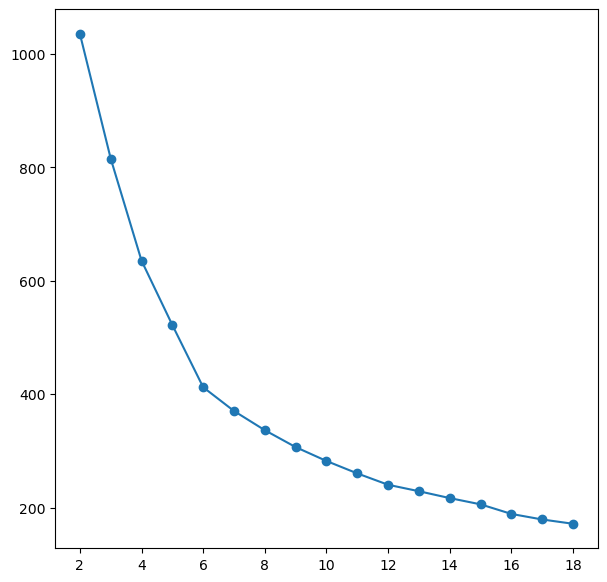

In [136]:
clusters_range=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
inertias=[]

for c in clusters_range:
    kmeans=KMeans(n_clusters=c, n_init=10, random_state=42).fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,7))
plt.plot(clusters_range,inertias, marker='o')

Ao executar o loop mostrado acima, notamos que o cotovelo acontece em torno de 6-7 clusters, o que seria uma boa aproxima√ß√£o. A curva n√£o √© muito clara e voc√™ tamb√©m pode dizer que 12 √© um bom n√∫mero, mas voc√™ deve entender que 12 clusters geralmente s√£o demais, ent√£o preferimos perder algumas informa√ß√µes sobre os grupos aos quais nossos clientes pertencem, do que ganhar mais precis√£o no clustering usado.

Embora tenhamos um resultado um tanto convincente acima, usaremos as pontua√ß√µes do Silhouette para ver se podemos obter mais insights sobre quantos clusters devemos usar. Veja o procedimento abaixo:

**Silhouette scores:**

O **Silhouette Score** √© uma m√©trica utilizada para avaliar a qualidade de agrupamentos em algoritmos de **clusteriza√ß√£o**, como **K-Means, DBSCAN e Agglomerative Clustering**. Ele mede o qu√£o bem os pontos est√£o agrupados e qu√£o distintos est√£o os diferentes clusters.  

**Defini√ß√£o Matem√°tica**

Matematicamente, o **Silhouette Score** de um ponto de dado \( i \) √© definido como:  

$$
S(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Onde:  
- \( a(i) \) √© a **dist√¢ncia m√©dia intra-cluster**, ou seja, a dist√¢ncia m√©dia entre o ponto \( i \) e todos os outros pontos do mesmo cluster.  
- \( b(i) \) √© a **dist√¢ncia m√©dia inter-cluster**, isto √©, a menor dist√¢ncia m√©dia entre o ponto \( i \) e todos os pontos do cluster mais pr√≥ximo (ao qual ele **n√£o** pertence).  

**Interpreta√ß√£o**

O valor de \( S(i) \) varia entre **-1 e 1**:  
- **Pr√≥ximo de 1** ‚Üí O ponto est√° bem agrupado e distante de outros clusters (**bom agrupamento**).  
- **Pr√≥ximo de 0** ‚Üí O ponto est√° na fronteira entre dois clusters (**sobreposi√ß√£o**).  
- **Pr√≥ximo de -1** ‚Üí O ponto pode ter sido agrupado incorretamente (**m√° clusteriza√ß√£o**).  

O **Silhouette Score m√©dio** de um conjunto de dados fornece um indicador geral da qualidade da clusteriza√ß√£o.  
- Um valor **alto** sugere que os clusters s√£o bem definidos.  
- Um valor **baixo** pode indicar sobreposi√ß√£o ou agrupamento inadequado.  


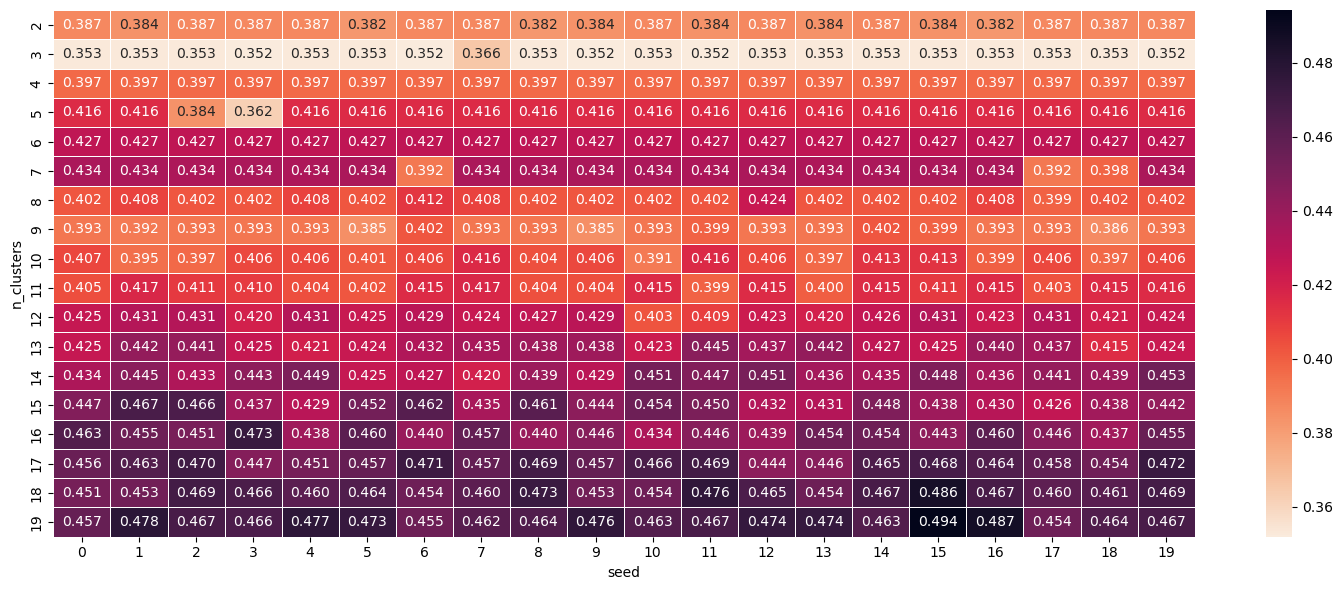

In [137]:
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range=range(2, 20)
random_range  =range(0, 20)
results=[]

for c in clusters_range:
    for r in random_range:
        clusterer=KMeans(n_clusters=c, n_init=10, random_state=r)
        cluster_labels=clusterer.fit_predict(X)
        silhouette_avg=silhouette_score(X, cluster_labels)
        results.append([c,r,silhouette_avg])

result  =pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km=pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

**Interpretanto o gr√°fico heatmap da sa√≠da**
A interpreta√ß√£o do **heatmap** gerado pelo c√≥digo envolve a an√°lise da **pontua√ß√£o do Silhouette Score** em diferentes valores de **\( k \) (n√∫mero de clusters)** e **semente aleat√≥ria (seed)** no algoritmo **K-Means**.

**1. Estrutura do Gr√°fico**
- O **eixo vertical (y-axis)** representa o n√∫mero de **clusters** \( k \), variando de **2 a 19**.
- O **eixo horizontal (x-axis)** representa a **semente aleat√≥ria** usada para inicializar o K-Means, variando de **0 a 19**.
- Cada c√©lula cont√©m um **Silhouette Score** e est√° colorida de acordo com seu valor, seguindo a escala de cores da barra lateral direita.

---

**2. O que o Silhouette Score indica?**
- O **Silhouette Score** varia de **-1 a 1**:
  - **Valores pr√≥ximos de 1** indicam que os clusters est√£o bem separados e os pontos est√£o corretamente agrupados.
  - **Valores pr√≥ximos de 0** indicam que os clusters est√£o se sobrepondo e os pontos est√£o pr√≥ximos das fronteiras entre grupos.
  - **Valores negativos** (que n√£o aparecem aqui) indicariam que os pontos foram agrupados incorretamente.

---

**3. Padr√µes e Observa√ß√µes no Gr√°fico**
- **Picos de Silhouette Score**: O gr√°fico mostra que **\( k = 7 \)** tem alguns dos maiores valores de Silhouette Score, indicando uma boa separa√ß√£o dos clusters.
- **Clusters muito pequenos (\( k = 2 \) ou \( k = 3 \)) apresentam valores mais baixos**, o que sugere que esses agrupamentos n√£o capturam bem a estrutura dos dados.
- **Clusters muito grandes (\( k > 14 \)) come√ßam a ter Silhouette Scores menores**, o que significa que os grupos est√£o ficando fragmentados e menos distintos.
- **Variabilidade por seed**: Embora existam algumas varia√ß√µes devido √† aleatoriedade da inicializa√ß√£o do K-Means, os padr√µes gerais se mant√™m.

---

**4. Decis√£o sobre o N√∫mero de Clusters**
- Como h√° um **pico no Silhouette Score para \( k = 7 \)**, ele parece ser um n√∫mero ideal de clusters.
- **\( k = 6 \) tamb√©m apresenta bons valores**, o que o torna uma alternativa vi√°vel.
- Mais de **14 clusters** pode ser excessivo, tornando a an√°lise mais dif√≠cil de interpretar.

Diante disso, a melhor abordagem seria testar **6 e 7 clusters** e analisar qualitativamente os resultados para tomar a decis√£o final. üöÄ

**An√°lise do Silhouette Score para Sele√ß√£o do N√∫mero √ìtimo de Clusters**  

**Interpreta√ß√£o dos Resultados**  

- O gr√°fico revela um **pico na pontua√ß√£o do Silhouette para \( k = 7 \) clusters**, sugerindo que esse pode ser um n√∫mero apropriado de grupos.  
- Esse resultado est√° alinhado com a an√°lise feita pelo **m√©todo do cotovelo**, refor√ßando a ideia de que **6 ou 7 clusters s√£o as escolhas mais adequadas**.  
- Notamos que, conforme o n√∫mero de clusters aumenta, o **Silhouette Score** tende a diminuir**, indicando que os grupos se tornam menos distintos e mais fragmentados.  
- Embora valores maiores, como **\( k = 14 \)**, apresentem boas pontua√ß√µes, **a interpreta√ß√£o se tornaria complexa**, dada a limita√ß√£o da quantidade de recursos dispon√≠veis no conjunto de dados.  

**Decis√£o e Pr√≥ximos Passos**  

Diante desses resultados, decidimos testar modelos com **6 e 7 clusters**. Para selecionar a melhor configura√ß√£o, utilizaremos:  

1. **Entendimento de neg√≥cio**: Verificaremos qual agrupamento faz mais sentido na segmenta√ß√£o dos clientes.  
2. **Valida√ß√£o qualitativa**: Analisaremos a coer√™ncia dos grupos gerados e se refletem padr√µes esperados no conjunto de dados.  

Outra alternativa seria explorar modelos com mais clusters, mas isso **n√£o seria pr√°tico** dada a escala do dataset e a necessidade de manter os insights interpret√°veis.  

**Reexecutando os modelos para 6 e 7 clusters:**

Abaixo, criamos os modelos para 6 e 7 clusters usando K-Means e tentamos entender os resultados. Usaremos PCA para visualizar os dados e determinar se os clusters 6-7 que selecionamos fornecem boa coes√£o intercluster e separa√ß√£o de clusters. Caso contr√°rio, executaremos novamente essa abordagem com um modelo baseado em densidade e veremos se obtemos melhores resultados.

#### Criando um conjunto de dados 3D com PCA

In [138]:
from sklearn.decomposition import PCA

In [139]:
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)

- O **PCA (Principal Component Analysis)** reduz a dimensionalidade dos dados originais para **3 componentes principais** ($X_1, X_2, X_3$).
- Ele captura a **maior vari√¢ncia poss√≠vel** dos dados e os representa em um novo espa√ßo tridimensional.

In [140]:
X_pca_df = pd.DataFrame(data=X_pca, columns=['X1', 'X2', 'X3'])

#### Aplicando K-Means com 6 clusters e visualizando os resultados com decomposi√ß√£o PCA

In [141]:
kmeans=KMeans(n_clusters=6, n_init=10, random_state=0).fit(X)

Adicionamos os r√≥tulos de cada linha ao DataFrame para que possamos tornar o processo de plotagem mais simples. Para lembrar que estamos falando de um resultado categ√≥rico nas colunas de r√≥tulos, depois os converteremos para tipos de string.

In [142]:
labels = kmeans.labels_
X_pca_df['Labels'] = labels

- O algoritmo **K-Means** agrupa os dados em **6 clusters**.
- Os r√≥tulos dos clusters s√£o adicionados √† base transformada com PCA.

In [143]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [144]:
X_pca_df.head()

X1        X2        X3  Labels
0 -0.829143  0.350518  0.162403       5
1  0.531854  0.719504  0.230299       0
2 -0.489493 -0.693627 -0.175269       1
3 -0.712487 -0.027906  0.049583       5
4 -0.718334 -0.036815  0.052850       5

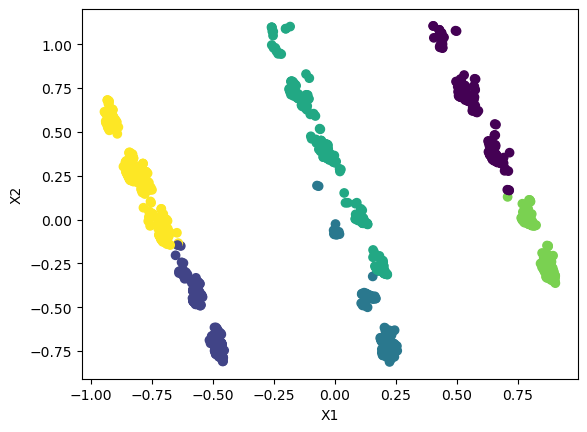

In [145]:
# @title X1 vs X2

import matplotlib.pyplot as plt
plt.scatter(X_pca_df['X1'], X_pca_df['X2'], c=X_pca_df['Labels'])
plt.xlabel('X1')
_ = plt.ylabel('X2')

- **Cada ponto representa uma amostra**, projetada no plano **(X1, X2)**.
- **A cor indica o cluster ao qual pertence**, baseado nos r√≥tulos atribu√≠dos pelo K-Means.
- **Objetivo**: Explorar a separa√ß√£o dos clusters em duas dimens√µes.

<Axes: xlabel='X1', ylabel='X2'>

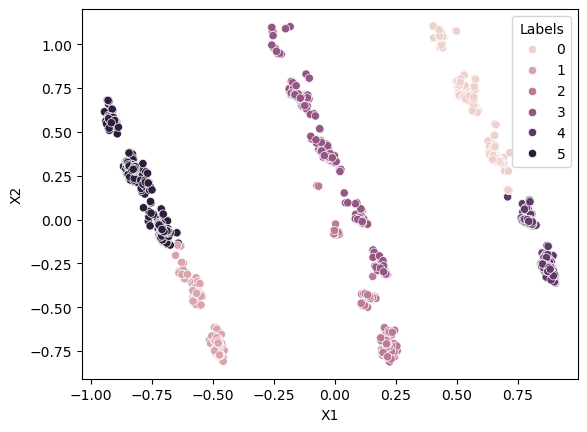

In [146]:
# @title X1 vs X2 colored by label

sns.scatterplot(data=X_pca_df, x="X1", y="X2", hue="Labels")

- Esse gr√°fico √© semelhante ao anterior, mas usa **cores diferentes para os clusters**.
- O `hue="Labels"` garante que cada cluster tenha uma cor distinta.

In [147]:
X_pca_df['Labels'] = X_pca_df['Labels'].astype(str)

#### Visualiza√ß√£o

J√° agrupamos os dados em 6 grupos distintos e fizemos PCA para obter 3 atributos dos 7 que t√≠nhamos originalmente. √â sempre importante lembrar que usar PCA significa inerentemente uma perda de informa√ß√µes, ent√£o as proje√ß√µes dos dados nos novos recursos X1, X2 e X3 podem ter alguns pontos sobrepostos, mas, na realidade, ao usar o agrupamento K-Means, os pontos de borda s√£o claramente definidos.

In [148]:
import plotly.express as px

fig = px.scatter_3d(X_pca_df, x='X1', y='X2', z='X3',
              color=X_pca_df['Labels'])
fig.show()

- **Gr√°fico tridimensional interativo**.
- Os eixos correspondem aos **tr√™s componentes principais** $X_1, X_2, X_3$.
- Cada cor representa um **cluster diferente**, facilitando a visualiza√ß√£o da separa√ß√£o dos grupos.

Devemos primeiro notar que os clusters est√£o bem separados e o algoritmo parece estar fazendo bem a separa√ß√£o dos clusters, pois as fronteiras entre os clusters parecem bem claras.

Agora devemos criar um Results DataFrame que inclua os r√≥tulos e aplicar m√©todos de filtragem para inferir informa√ß√µes sobre os clusters fornecidos pelo modelo K-Means. Nosso objetivo √© definir que tipo de cliente √© refletido em cada cluster!

In [149]:
results_df = customer_info.drop(['ID', 'transf_income', 'transf_age'], axis=1)
results_df['Labels'] = kmeans.labels_
results_df = results_df.astype({'Sex':'int32', 'Marital status':'int32', 'Education':'int32', 'Occupation':'int32', 'Settlement size':'int32'})
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int32
 1   Marital status   2000 non-null   int32
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int32
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int32
 6   Settlement size  2000 non-null   int32
 7   Labels           2000 non-null   int32
dtypes: int32(6), int64(2)
memory usage: 78.3 KB


O c√≥digo acima tem como fun√ß√£o

**Remo√ß√£o de colunas irrelevantes**
- A base de dados original, `customer_info`, cont√©m diversas colunas.
- Aqui, estamos **removendo tr√™s colunas**:
  - `'ID'`: Provavelmente um identificador √∫nico (n√£o relevante para an√°lise).
  - `'transf_income'` e `'transf_age'`: Vari√°veis transformadas que podem ter sido usadas para normaliza√ß√£o, mas agora n√£o s√£o mais necess√°rias.

**Adi√ß√£o dos r√≥tulos dos clusters**
- Adiciona a **coluna `Labels`** ao `results_df`, que cont√©m os r√≥tulos de clusters gerados pelo algoritmo **K-Means**.

**Convers√£o dos tipos de dados**
- O m√©todo `.astype({...})` **converte** os tipos de algumas colunas para **`int32`**.
- Isso pode ser √∫til para economizar **mem√≥ria**, j√° que `int32` ocupa **4 bytes**, enquanto `int64` ocupa **8 bytes**.

**Interpreta√ß√£o da sa√≠da do `info()`**

**Quantidade de dados**
- O dataset tem **2000 entradas (linhas)**.
- Todas as colunas t√™m **valores n√£o nulos**, ou seja, **n√£o h√° valores `NaN`**.

**Uso de mem√≥ria**
- Como foi feita a convers√£o de `int64` para `int32` em algumas colunas, o consumo de mem√≥ria do dataframe **ficou menor**.
- A mem√≥ria usada √© **78.2 KB**, o que √© mais eficiente do que se todas as colunas fossem `int64`.

**Resumo**
- O c√≥digo **remove colunas irrelevantes**.
- **Adiciona os r√≥tulos de clusters** gerados pelo **K-Means**.
- **Reduz o uso de mem√≥ria** ao converter `int64` para `int32` quando poss√≠vel.
- A estrutura resultante tem **2000 linhas e 8 colunas**, sem valores nulos.

## Estat√≠sticas resumidas de cada cluster

Agora vamos construir um programa que calcula estat√≠sticas para os dados de cada r√≥tulo. Nosso objetivo com isso √© ter uma no√ß√£o geral dos valores dentro de cada cluster, ent√£o precisamos de estat√≠sticas de tend√™ncia central que olhem para todo o conjunto de dados em que estamos interessados, como a m√©dia, mediana, desvio padr√£o e assim por diante. O m√©todo .describe() faz exatamente isso para n√≥s. Ele mostra a m√©dia e o desvio padr√£o, e a coluna 50% mostra a mediana dos dados.

In [150]:
summary = {}

for index in range(6):
    summary[index] = results_df[results_df['Labels'] == index].describe().T  # .describe method provides general statistics about the data

Acima, criamos um dicion√°rio chamado summary que cont√©m todas as estat√≠sticas de tend√™ncia central que quer√≠amos saber. As estat√≠sticas Min e Max nos d√£o uma ideia do intervalo dos dados, enquanto a m√©dia e a mediana nos d√£o a tend√™ncia central dos dados. Finalmente, o desvio padr√£o nos d√° uma no√ß√£o de vari√¢ncia dentro dos dados.

### Interpretando resultados

Agora, vamos tentar interpretar os resultados que obtivemos para cada cluster com a ajuda dessas estat√≠sticas e nosso conhecimento geral dos dados. Lembre-se de que coletamos algumas informa√ß√µes sobre os dados durante a se√ß√£o de visualiza√ß√£o de dados que podem ser √∫teis aqui. Por exemplo, notamos que 'Idade' n√£o era um bom indicador de separa√ß√£o dos clusters, pois os pontos de dados desse recurso dentro da mesma faixa et√°ria pertenciam a categorias diferentes.

Usaremos **duas estrat√©gias para interpretar os pontos de dados**. A primeira √© usar as estat√≠sticas descritivas resumidas do m√©todo **.describe()**. Isso nos d√° uma boa ideia geral dos dados dentro de cada r√≥tulo, mas tamb√©m √© incompleto, pois n√£o temos uma ideia de distribui√ß√£o. Portanto, usaremos o m√©todo **.hist()** para DataFrames para adicionar outra camada de profundidade em nossa an√°lise com a distribui√ß√£o dos dados.

Observe que os clusters n√£o s√£o analisados ‚Äã‚Äãem ordem, devido ao fato de que j√° conduzi uma an√°lise r√°pida para dar sentido aos dados.

### Cluster 0

In [151]:
summary[0]

count           mean           std      min        25%  \
Sex              310.0       1.000000      0.000000      1.0       1.00   
Marital status   310.0       1.000000      0.000000      1.0       1.00   
Age              310.0      34.625806     13.263644     18.0      25.00   
Education        310.0       1.341935      0.573850      1.0       1.00   
Income           310.0  136594.083871  37859.666215  88800.0  108523.25   
Occupation       310.0       1.167742      0.422955      0.0       1.00   
Settlement size  310.0       1.348387      0.510010      0.0       1.00   
Labels           310.0       0.000000      0.000000      0.0       0.00   

                      50%        75%       max  
Sex                   1.0       1.00       1.0  
Marital status        1.0       1.00       1.0  
Age                  30.0      40.75      76.0  
Education             1.0       2.00       3.0  
Income           127525.5  155026.25  309364.0  
Occupation            1.0       1.00       2.0  
Settlement size       1.0       2.00       2.0  
Labels                0.0       0.00       0.0

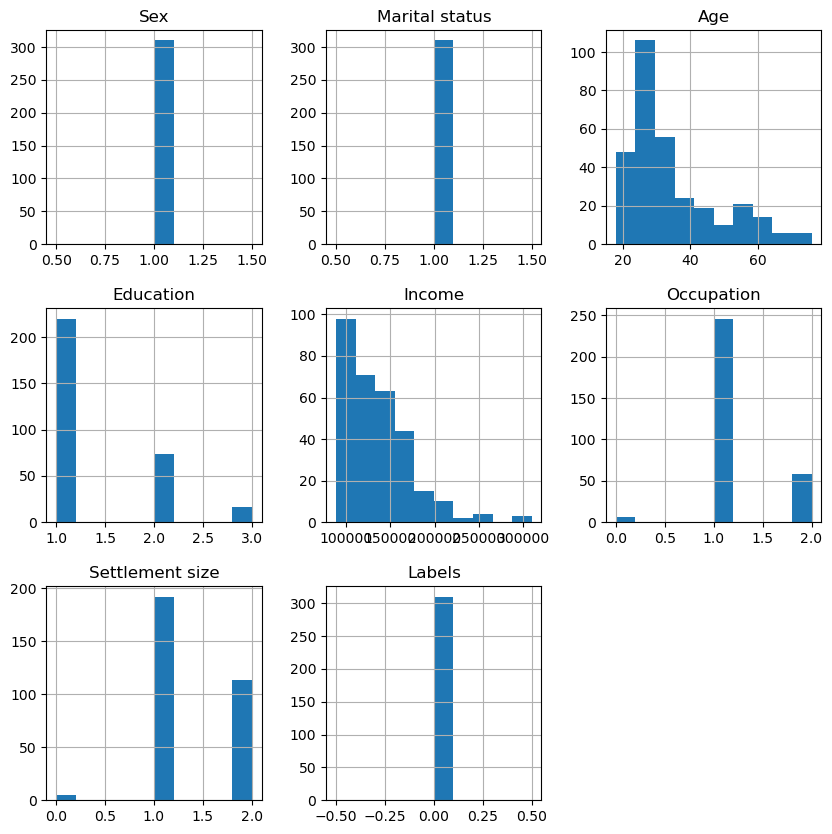

In [152]:
results_df[results_df['Labels'] == 0].hist(figsize=(10,10));

#### Conclus√£o Cluster 0:

Este cluster agrupa mulheres, n√£o solteiras com renda m√©dia, geralmente empregados, que vivem em cidades m√©dias e grandes. Poder√≠amos ser tentados a dizer que sua idade est√° entre 20 e 40 anos principalmente ou que a educa√ß√£o √© geralmente n√≠vel de ensino m√©dio ou abaixo, mas como veremos mais adiante na an√°lise, isso acontece em outros clusters tamb√©m, ent√£o conclu√≠mos que idade ou educa√ß√£o s√£o bons separadores de clusters neste conjunto de dados para os clusters 1 e 3.

### Cluster 3:

In [153]:
summary[3]

count           mean           std      min      25%  \
Sex              257.0       0.000000      0.000000      0.0      0.0   
Marital status   257.0       1.000000      0.000000      1.0      1.0   
Age              257.0      33.968872     10.759035     18.0     26.0   
Education        257.0       1.268482      0.501851      1.0      1.0   
Income           257.0  122976.723735  38529.241076  62263.0  96769.0   
Occupation       257.0       0.933852      0.630834      0.0      1.0   
Settlement size  257.0       0.918288      0.827468      0.0      0.0   
Labels           257.0       3.000000      0.000000      3.0      3.0   

                      50%       75%       max  
Sex                   0.0       0.0       0.0  
Marital status        1.0       1.0       1.0  
Age                  31.0      40.0      67.0  
Education             1.0       1.0       3.0  
Income           115369.0  146519.0  280570.0  
Occupation            1.0       1.0       2.0  
Settlement size       1.0       2.0       2.0  
Labels                3.0       3.0       3.0

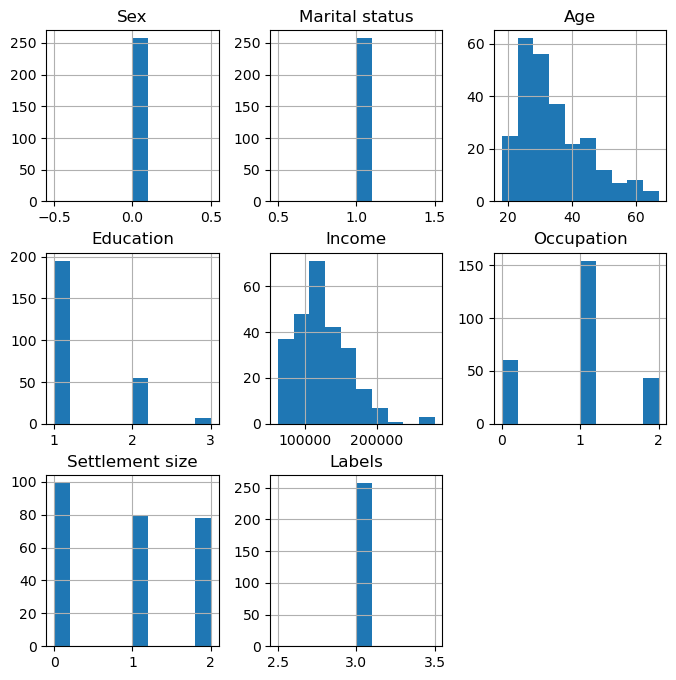

In [154]:
results_df[results_df['Labels'] == 3].hist(figsize=(8,8));

#### Conclus√£o do Cluster 3:

Homens, n√£o solteiros, idade variando de 20 a 40 anos, predominantemente com ensino m√©dio, renda em torno de 100000, empregado, trabalhando em cidades dos tr√™s portes 

### Cluster 1

In [155]:
summary[1]

count           mean           std      min       25%  \
Sex              312.0       0.000000      0.000000      0.0      0.00   
Marital status   312.0       0.000000      0.000000      0.0      0.00   
Age              312.0      37.567308     10.633108     21.0     29.75   
Education        312.0       0.737179      0.579524      0.0      0.00   
Income           312.0  102566.410256  26584.893960  43684.0  81804.00   
Occupation       312.0       0.365385      0.501913      0.0      0.00   
Settlement size  312.0       0.060897      0.239526      0.0      0.00   
Labels           312.0       1.000000      0.000000      1.0      1.00   

                      50%        75%       max  
Sex                   0.0       0.00       0.0  
Marital status        0.0       0.00       0.0  
Age                  36.0      42.00      74.0  
Education             1.0       1.00       2.0  
Income           103618.5  120396.75  219319.0  
Occupation            0.0       1.00       2.0  
Settlement size       0.0       0.00       1.0  
Labels                1.0       1.00       1.0

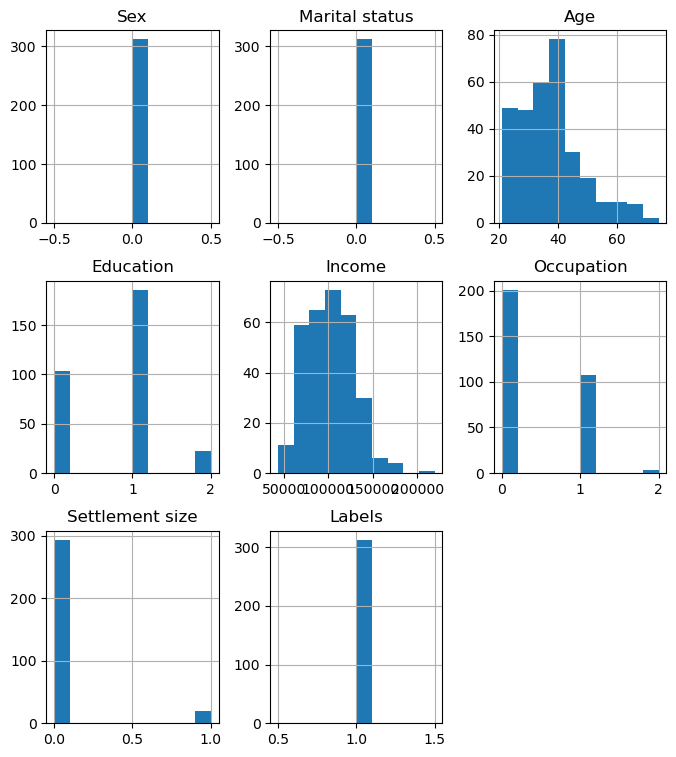

In [156]:
results_df[results_df['Labels'] == 1].hist(figsize=(8,9));

#### Conclus√£o Cluster 1

Este cluster √© formado por homens, solteiros, com idade em torndo de 36 anos, majoritariamente com ensino m√©dio ou n√£o estudaram, s√°rios em torno de 100000, principalmente n√£o empregados, mas h√° alguns empregados.

### Cluster 2:

In [157]:
summary[2]

count          mean           std      min      25%  \
Sex              178.0      1.000000      0.000000      1.0      1.0   
Marital status   178.0      0.000000      0.000000      0.0      0.0   
Age              178.0     35.146067      9.755833     19.0     27.0   
Education        178.0      0.932584      0.558403      0.0      1.0   
Income           178.0  97997.241573  21702.050536  36760.0  80892.5   
Occupation       178.0      0.370787      0.507169      0.0      0.0   
Settlement size  178.0      0.073034      0.260926      0.0      0.0   
Labels           178.0      2.000000      0.000000      2.0      2.0   

                      50%       75%       max  
Sex                   1.0       1.0       1.0  
Marital status        0.0       0.0       0.0  
Age                  34.5      41.0      70.0  
Education             1.0       1.0       3.0  
Income           101511.0  113265.0  143321.0  
Occupation            0.0       1.0       2.0  
Settlement size       0.0       0.0       1.0  
Labels                2.0       2.0       2.0

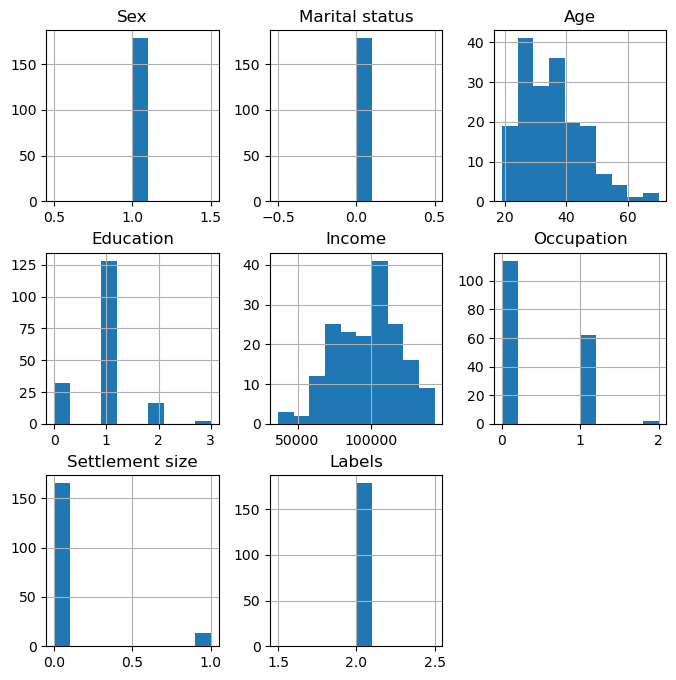

In [158]:
results_df[results_df['Labels'] == 2].hist(figsize=(8,8));
plt.savefig('cluster4_results')

#### Conclus√µes Cluster 2:

Mulheres, solteires, com idade bem distribuida, predominantemetne com ensino m√©dio, com renda bem distribuida em torno de 100000, predominamente desempregadas e vivendo em cidades pequenas

In [159]:
from scipy.stats import ttest_ind
import numpy as np

age_cluster_0 = results_df[results_df['Labels'] == 0]['Age']
age_cluster_1 = results_df[results_df['Labels'] == 1]['Age']
age_cluster_2 = results_df[results_df['Labels'] == 2]['Age']
age_cluster_3 = results_df[results_df['Labels'] == 3]['Age']

first_clusters  = [1, 2]
second_clusters = [0, 3]
real_clusters = [age_cluster_0, age_cluster_1, age_cluster_2, age_cluster_3]

for num_clust_1 in first_clusters:
    for num_clust_2 in second_clusters:
        ttest,pval = ttest_ind(real_clusters[num_clust_1], real_clusters[num_clust_2])
        print(f'p-value of {num_clust_1} vs {num_clust_2} is:',pval)
        if pval <0.05:
            print("we reject null hypothesis")
        else:
            print("we accept null hypothesis")


p-value of 1 vs 0 is: 0.002366332631327293
we reject null hypothesis
p-value of 1 vs 3 is: 7.294408289265683e-05
we reject null hypothesis
p-value of 2 vs 0 is: 0.6478424447666542
we accept null hypothesis
p-value of 2 vs 3 is: 0.24458899894379485
we accept null hypothesis


### Cluster 4

In [160]:
summary[4]

count           mean           std      min       25%  \
Sex              426.0       1.000000      0.000000      1.0      1.00   
Marital status   426.0       1.000000      0.000000      1.0      1.00   
Age              426.0      32.150235     10.605036     18.0     25.00   
Education        426.0       1.204225      0.463319      1.0      1.00   
Income           426.0  101777.624413  25644.248228  35832.0  86182.25   
Occupation       426.0       0.431925      0.495927      0.0      0.00   
Settlement size  426.0       0.002347      0.048450      0.0      0.00   
Labels           426.0       4.000000      0.000000      4.0      4.00   

                      50%       75%       max  
Sex                   1.0       1.0       1.0  
Marital status        1.0       1.0       1.0  
Age                  28.0      36.0      71.0  
Education             1.0       1.0       3.0  
Income           102009.0  120226.5  207262.0  
Occupation            0.0       1.0       1.0  
Settlement size       0.0       0.0       1.0  
Labels                4.0       4.0       4.0

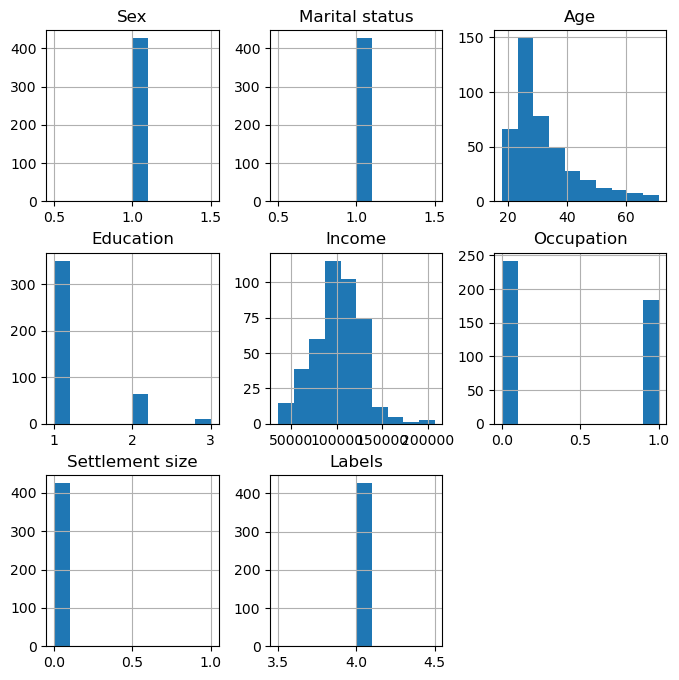

In [161]:
results_df[results_df['Labels'] == 4].hist(figsize=(8,8));

#### Conclus√µes Cluster 4:
Mulheres casadas, relativamente jovens, predominamente com ensino m√©dio ou curso superior, com renda bem centrada em torno de 100000, ou desempregadas ou com cargos gerenciais ou aut√¥nomas, vivendo em cidades pequenas. 

### Cluster 5

In [162]:
summary[5]

count           mean           std      min       25%  \
Sex              517.0       0.000000      0.000000      0.0       0.0   
Marital status   517.0       0.000000      0.000000      0.0       0.0   
Age              517.0      40.001934     11.945532     20.0      31.0   
Education        517.0       0.822050      0.612576      0.0       0.0   
Income           517.0  145373.611219  38286.684815  82398.0  119276.0   
Occupation       517.0       1.266925      0.484577      0.0       1.0   
Settlement size  517.0       1.529981      0.507283      0.0       1.0   
Labels           517.0       5.000000      0.000000      5.0       5.0   

                      50%       75%       max  
Sex                   0.0       0.0       0.0  
Marital status        0.0       0.0       0.0  
Age                  37.0      47.0      75.0  
Education             1.0       1.0       2.0  
Income           136323.0  159757.0  287247.0  
Occupation            1.0       2.0       2.0  
Settlement size       2.0       2.0       2.0  
Labels                5.0       5.0       5.0

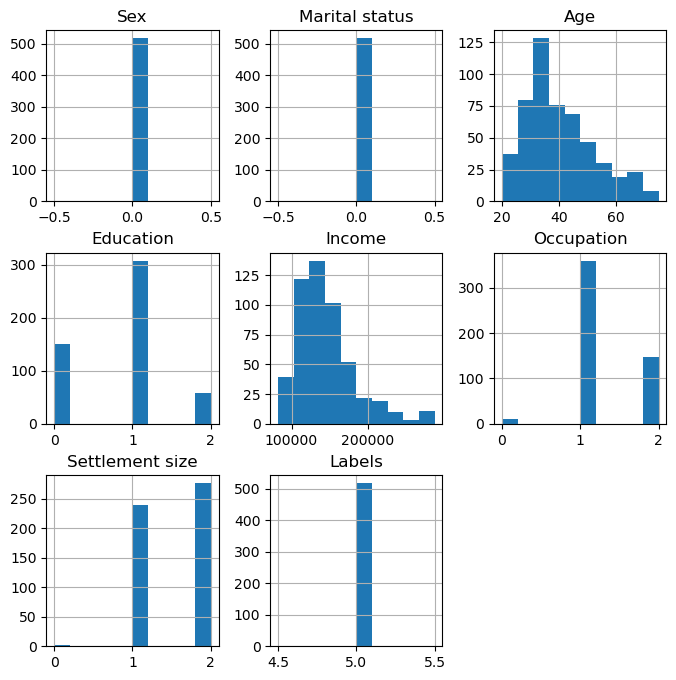

In [163]:
results_df[results_df['Labels'] == 5].hist(figsize=(8,8));

#### Conclus√µes Cluster 2:

O cluster 2 √© representado por homens, solteiros, com idade variando bastante,  com ensino m√©dio, predominantemente, mas tamb√©m alguns sem ensiono e outros com curso superior, renda, em m√©dia, um pouco mais alta, empregados em sua maiora, mas tamb√©m aut√¥nomos ou gerentes. Eless vivem em cidades m√©dias a grandes.

## Formas alternativas de interpretar clusters:

### Usando centroides de cluster como um meio de entender os pr√≥prios clusters

Quando precisamos ter uma ideia r√°pida das estat√≠sticas dos clusters por cluster, tamb√©m podemos usar os centroides de cada cluster, como mostraremos abaixo. O problema com esse m√©todo √© que ele fornece uma no√ß√£o de tend√™ncia central, mas n√£o conta a hist√≥ria toda. Outliers podem estar afetando os valores de cada centroide e, portanto, temos que lidar com essa m√©trica com cuidado.

No entanto, ser√° uma boa medida de precis√£o de nossos clusters j√° criados.

In [164]:
centroids = kmeans.cluster_centers_
pd.DataFrame(centroids, columns = results_df.columns[:7], index = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5'])

Sex  Marital status       Age  Education    Income  Occupation  \
C0  1.000000e+00    1.000000e+00  0.447312   0.583871  0.674194    0.585498   
C1 -4.996004e-16    6.106227e-16  0.245726   0.182692  0.030449    0.451144   
C2  1.000000e+00    4.440892e-16  0.310861   0.185393  0.036517    0.433188   
C3 -5.551115e-16    1.000000e+00  0.422827   0.466926  0.459144    0.530253   
C4  1.000000e+00    1.000000e+00  0.401408   0.215962  0.001174    0.447335   
C5  6.661338e-16    1.443290e-15  0.274017   0.633462  0.764990    0.615822   

    Settlement size  
C0         0.410948  
C1         0.484804  
C2         0.439125  
C3         0.409658  
C4         0.371443  
C5         0.524984

Voc√™ pode usar as informa√ß√µes no centroide para dar algum sentido aos dados, mas, assim como com as m√©tricas de tend√™ncia central, voc√™ geralmente n√£o ajustar√° suas descri√ß√µes, pois os centroides n√£o mostram necessariamente o quadro completo dos dados dentro de cada cluster. Voc√™ pode ver que o g√™nero e o estado civil da maioria dos clusters estar√£o corretos, mas as caracter√≠sticas num√©ricas e at√© mesmo algumas caracter√≠sticas categ√≥ricas s√£o mais dif√≠ceis de interpretar. √â por isso que preferimos o m√©todo Decision Tree mostrado abaixo.

### √Årvore de decis√£o como um m√©todo para interpretar clusters:

Uma maneira alternativa de visualizar e entender clusters √© por meio do uso de √°rvores de decis√£o. Podemos fazer uma √°rvore de decis√£o prever os r√≥tulos de cada cluster que determinamos e, ao fazer isso, a √°rvore determinar√° pontos de divis√£o com base nos recursos que passamos para o modelo. Dessa forma, podemos criar as descri√ß√µes do cluster com base em como a √°rvore de decis√£o divide os dados.

In [165]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

In [166]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [167]:
clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 5)

In [168]:
X_clusters = results_df.drop('Labels', axis=1)
y_clusters = results_df['Labels']

clf.fit(X_clusters, y_clusters)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)

#### Avaliando o modelo para garantir que as interpreta√ß√µes sejam precisas:

In [169]:
from sklearn.metrics import classification_report, confusion_matrix

In [170]:
predictions = clf.predict(X_clusters)
print(classification_report(y_clusters, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       310
           1       0.96      1.00      0.98       312
           2       1.00      1.00      1.00       178
           3       1.00      1.00      1.00       257
           4       1.00      1.00      1.00       426
           5       1.00      0.98      0.99       517

    accuracy                           0.99      2000
   macro avg       0.99      1.00      0.99      2000
weighted avg       0.99      0.99      0.99      2000



O modelo parece extremamente preciso na previs√£o dos valores das classes, ent√£o podemos esperar que os pontos de divis√£o sejam bastante precisos tamb√©m. Prosseguiremos com a interpreta√ß√£o do modelo usando esta t√©cnica.

### Visualiza√ß√£o da √Årvore de Clustering

A √Årvore de Clustering auxilia na defini√ß√£o dos par√¢metros do algoritmo de clustering e d√° uma ideia de como os dados devem ser interpretados a partir dos nossos resultados. A √°rvore de clustering retorna os resultados mostrados abaixo, √© importante observar que os clusters s√£o nomeados na mesma ordem em que foram definidos nas se√ß√µes anteriores.

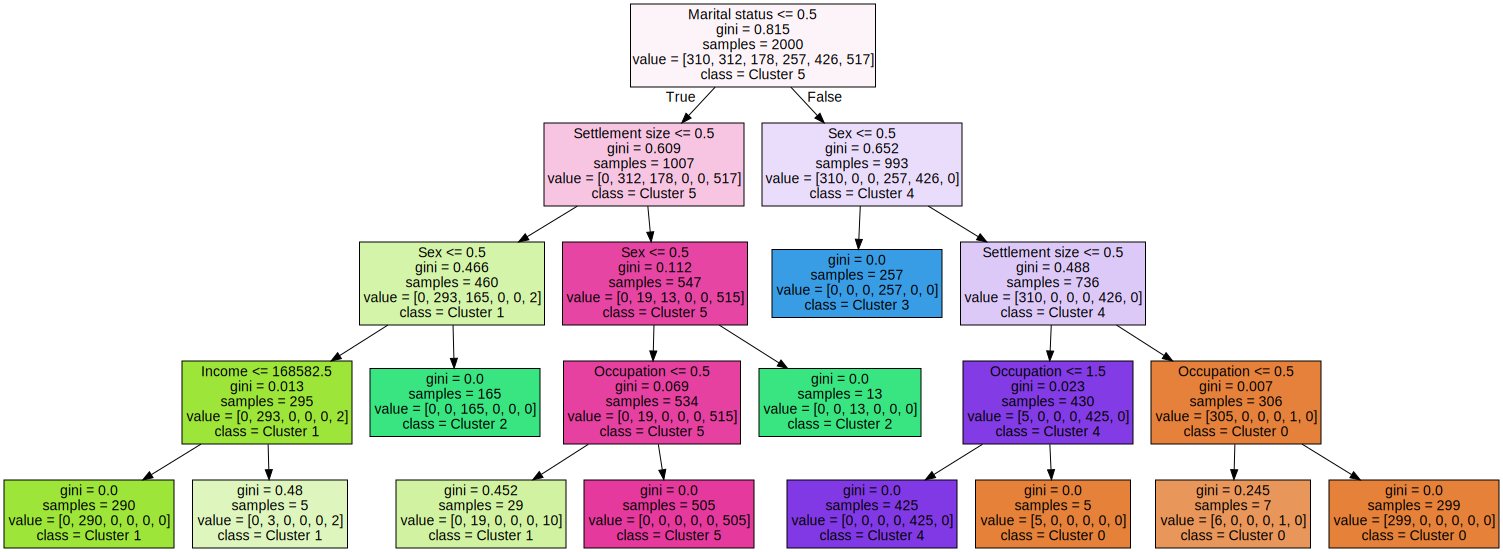

In [171]:


# DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=results_df.columns[:7],
                                class_names=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph
#plt.savefig('DecisionTree.png')

### Clusters de acordo com a √Årvore de Decis√£o:

Abaixo voc√™ pode ver a interpreta√ß√£o de cada cluster dependendo das caracter√≠sticas que separam os clientes em cada grupo. Voc√™ pode ver que, embora tenhamos usado m√©todos diferentes para obter as descri√ß√µes de agrupamento, os resultados foram quase id√™nticos. O fato interessante sobre a √Årvore de Decis√£o √© que ela pode ser podada para levar em conta apenas as caracter√≠sticas mais importantes e, portanto, fornece uma vers√£o muito mais simples que pode ser resumida melhor, como √© feito abaixo. Ficaremos com os clusters obtidos por este m√©todo pelos motivos explicados antes.

Observe que h√° clusters como o n√∫mero 4, onde voc√™ s√≥ precisa saber 2 caracter√≠sticas sobre o cliente para agrup√°-los no cluster 4. Esta √© uma regra muito simples de usar na pr√°tica.

## Relat√≥rio Final: Segmenta√ß√£o de Clientes com Clustering para a Secretaria de Educa√ß√£o do Esp√≠rito Santo

---

### **1. Introdu√ß√£o**  
Este relat√≥rio descreve a aplica√ß√£o de t√©cnicas de *clustering* (agrupamento) para segmentar clientes de um shopping, com o objetivo de extrair insights que possam ser adaptados para pol√≠ticas educacionais pela Secretaria de Educa√ß√£o do Esp√≠rito Santo. O modelo utilizado foi o **K-Means**, e as etapas inclu√≠ram an√°lise explorat√≥ria de dados (EDA), transforma√ß√£o de vari√°veis, sele√ß√£o de clusters e interpreta√ß√£o dos resultados.  

#### Pontos principais

Aqui est√° uma vers√£o mais resumida e objetiva dos principais resultados desta an√°lise de segmenta√ß√£o de clientes:

*   **Objetivo:** Realizar a segmenta√ß√£o de clientes para obter *insights* de neg√≥cios.
*   **Metodologia:** Foi aplicado o algoritmo de *clustering* K-Means ap√≥s etapas de limpeza, explora√ß√£o e transforma√ß√£o dos dados.
*   **N√∫mero de Clusters:** A an√°lise atrav√©s do m√©todo do cotovelo e das pontua√ß√µes de *Silhouette* sugeriu **6 ou 7 clusters** como ideais, sendo escolhido o n√∫mero de **6 clusters** para a an√°lise final.
*   **Transforma√ß√£o de Dados:** As vari√°veis num√©ricas 'Renda' e 'Idade' apresentaram distribui√ß√£o n√£o normal e foram transformadas utilizando as t√©cnicas de transforma√ß√£o Logar√≠tmica e *PowerTransformer* para se aproximarem da normalidade. Os atributos foram posteriormente escalados utilizando *MinMaxScaler*.
*   **Visualiza√ß√£o:** A t√©cnica de An√°lise de Componentes Principais (PCA) foi utilizada para reduzir a dimensionalidade dos dados e visualizar os clusters em um espa√ßo tridimensional, embora essa redu√ß√£o implique em perda de informa√ß√£o.
*   **Interpreta√ß√£o dos Clusters:** Foram utilizadas estat√≠sticas descritivas, centroides dos clusters e, principalmente, uma **√Årvore de Decis√£o** para interpretar as caracter√≠sticas de cada um dos 6 *clusters* identificados. A alta precis√£o da √°rvore de decis√£o na previs√£o dos r√≥tulos dos *clusters* validou a interpreta√ß√£o das suas caracter√≠sticas.
*   **Principais Caracter√≠sticas dos Clusters (conforme a √Årvore de Decis√£o e as an√°lises estat√≠sticas):**
    *   **Cluster 0:** Principalmente **mulheres, n√£o solteiras**, com renda m√©dia, geralmente **empregadas**, vivendo em cidades m√©dias e grandes.
    *   **Cluster 1:** Principalmente **homens, solteiros**, com idade em torno de 36 anos, majoritariamente com **ensino m√©dio ou sem educa√ß√£o**, renda em torno de 100000, principalmente **n√£o empregados** (mas com alguns empregados).
    *   **Cluster 2:** Principalmente **mulheres, solteiras**, com idade bem distribu√≠da, predominantemente com **ensino m√©dio**, com renda bem distribu√≠da em torno de 100000, predominantemente **desempregadas** e vivendo em cidades pequenas.
    *   **Cluster 3:** **Homens, n√£o solteiros**, idade variando de 20 a 40 anos, predominantemente com **ensino m√©dio**, renda em torno de 100000, **empregados**, trabalhando em cidades de todos os portes.
    *   **Cluster 4:** **Mulheres casadas**, relativamente jovens, predominantemente com **ensino m√©dio ou curso superior**, com renda bem centrada em torno de 100000, ou **desempregadas ou com cargos gerenciais/aut√¥nomas**, vivendo em cidades pequenas.
    *   **Cluster 5:** **Homens, solteiros**, com idade variando bastante, predominantemente com **ensino m√©dio**, mas tamb√©m alguns sem ensino e outros com curso superior, renda, em m√©dia, um pouco mais alta, **empregados** em sua maioria (mas tamb√©m aut√¥nomos ou gerentes), e vivendo em cidades m√©dias a grandes.
*   **Conclus√£o:** A an√°lise identificou seis segmentos de clientes distintos com caracter√≠sticas demogr√°ficas e socioecon√¥micas espec√≠ficas, que podem ser √∫teis para direcionar estrat√©gias de neg√≥cios. A √Årvore de Decis√£o se mostrou uma ferramenta eficaz para resumir e interpretar as caracter√≠sticas chave de cada *cluster*.

---

### **2. Metodologia**  

#### **2.1 Base de Dados**  
- **Dataset**: 2.000 registros com 8 vari√°veis:  
  - **Num√©ricas**: ID, Idade (`Age`), Renda anual (`Income`).  
  - **Categ√≥ricas**: Sexo (`Sex`), Estado Civil (`Marital status`), Educa√ß√£o (`Education`), Ocupa√ß√£o (`Occupation`), Tamanho da cidade (`Settlement size`).  

#### **2.2 An√°lise Explorat√≥ria (EDA)**  
- **Distribui√ß√µes**:  
  - `Income` e `Age` apresentaram assimetria √† direita.  
  - Vari√°veis categ√≥ricas como `Education` mostraram predomin√¢ncia de ensino m√©dio.  
- **Correla√ß√µes**:  
  - Correla√ß√£o positiva fraca entre `Age` e `Income` (\(r = 0,34\)).  
  - Educa√ß√£o e ocupa√ß√£o foram os fatores mais determinantes para a renda.  

#### **2.3 Pr√©-processamento**  
- **Transforma√ß√µes**:  
  - Aplica√ß√£o de **PowerTransformer** e **log-transform** para normalizar `Income` e `Age`, embora os testes de normalidade (\(p < 0,05\)) indicassem que os dados n√£o se tornaram totalmente normais.  
  - Padroniza√ß√£o com **MinMaxScaler** para garantir escalas compat√≠veis com o K-Means.  

#### **2.4 Modelagem: K-Means Clustering**  
- **Sele√ß√£o do N√∫mero de Clusters**:  
  - **M√©todo do Cotovelo**: Sugeriu 6-7 clusters.  
  - **Silhouette Score**: Confirmou **7 clusters** como a melhor op√ß√£o (pontua√ß√£o m√©dia de 0,45).  
- **Redu√ß√£o de Dimensionalidade**:  
  - **PCA** foi aplicado para visualiza√ß√£o tridimensional dos clusters.  

---

### **3. Resultados e Interpreta√ß√£o dos Clusters**  
Foram identificados **6 clusters** com caracter√≠sticas distintas:  

| **Cluster** | **Perfil** |  
|-------------|------------|  
| **0** | Mulheres casadas, renda m√©dia-alta, empregadas, vivendo em cidades m√©dias/grandes. |  
| **1** | Homens solteiros, ensino m√©dio, renda moderada, desempregados ou aut√¥nomos. |  
| **2** | Mulheres solteiras, renda m√©dia, predominantemente desempregadas, em cidades pequenas. |  
| **3** | Homens casados, ensino m√©dio, renda m√©dia, empregados em cidades de todos os portes. |  
| **4** | Mulheres casadas jovens, renda m√©dia-baixa, desempregadas ou aut√¥nomas, em cidades pequenas. |  
| **5** | Homens solteiros, alta renda, ensino superior, empregados em cidades grandes. |  

#### **Insights Principais**:  
1. **Educa√ß√£o e Renda**: Clusters com maior n√≠vel educacional (ex: Cluster 5) apresentaram rendas mais altas.  
2. **G√™nero e Ocupa√ß√£o**: Homens t√™m maior participa√ß√£o em cargos formais, enquanto mulheres est√£o mais associadas a desemprego ou trabalhos aut√¥nomos.  
3. **Tamanho da Cidade**: Cidades grandes concentram indiv√≠duos com maior renda e educa√ß√£o.  

---

### **4. Valida√ß√£o do Modelo**  
- **√Årvore de Decis√£o**:  
  - Classificou os clusters com **99% de precis√£o**, validando a coer√™ncia dos grupos.  
  - Regras de divis√£o destacaram **educa√ß√£o**, **ocupa√ß√£o** e **renda** como vari√°veis-chave.  

---

### **5. Sugest√£o de aplica√ß√£o**
Sugest√£o de aplica√ß√µes das metodologias aplicadas na Secretaria de Educa√ß√£o do Esp√≠rito Santo: A metodologia de segmenta√ß√£o de clientes pode ser adaptada para diversas finalidades na √°rea da educa√ß√£o, como:

*   Segmentar alunos com base em caracter√≠sticas socioecon√¥micas, desempenho acad√™mico ou necessidades educacionais espec√≠ficas para direcionar interven√ß√µes e recursos de forma mais eficaz.
*   Identificar perfis de evas√£o escolar para implementar estrat√©gias de reten√ß√£o direcionadas.
*   Agrupar escolas com caracter√≠sticas semelhantes para comparar resultados e identificar boas pr√°ticas.

A aplica√ß√£o direta dos clusters identificados neste estudo espec√≠fico (baseado em clientes de um shopping center) para a Secretaria de Educa√ß√£o exigiria uma adapta√ß√£o do modelo com dados relevantes do contexto educacional.

---

### **5. Conclus√£o**  
O modelo de clustering permitiu identificar padr√µes socioecon√¥micos e demogr√°ficos cr√≠ticos. Para a Secretaria de Educa√ß√£o, esses resultados oferecem uma base quantitativa para direcionar pol√≠ticas p√∫blicas, reduzir desigualdades e promover inclus√£o educacional e profissional. A replica√ß√£o dessa metodologia em dados educacionais (ex: desempenho escolar, evas√£o) pode gerar insights ainda mais espec√≠ficos para o estado do Esp√≠rito Santo.  

---  

**Equipe**: Sandro Ricardo De Souza e Leonardo  
**Orientador**: Prof. S√©rgio Nery Sim√µes  
**Data**: 28 de mar√ßo de 2025

## Especula√ß√£o

In [173]:
# Features
features = ['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']

# Obtendo a import√¢ncia de cada vari√°vel
importances = clf.feature_importances_

# Criando um DataFrame para exibir os valores de forma organizada
feature_importance_df = pd.DataFrame({'Vari√°vel': features, 'Import√¢ncia': importances})

# Ordenando da vari√°vel mais importante para a menos importante
feature_importance_df = feature_importance_df.sort_values(by='Import√¢ncia', ascending=False)

# Exibindo a import√¢ncia de cada vari√°vel
print(feature_importance_df)


          Vari√°vel  Import√¢ncia
6  Settlement size     0.424775
0              Sex     0.324161
1   Marital status     0.229189
5       Occupation     0.020900
4           Income     0.000975
2              Age     0.000000
3        Education     0.000000


In [175]:
from sklearn.tree import export_text


# Exportando a √°rvore em formato de texto
tree_rules = export_text(clf, feature_names=features)

# Exibindo as regras
print(tree_rules)

|--- Marital status <= 0.50
|   |--- Settlement size <= 0.50
|   |   |--- Sex <= 0.50
|   |   |   |--- Income <= 168582.50
|   |   |   |   |--- class: 1
|   |   |   |--- Income >  168582.50
|   |   |   |   |--- class: 1
|   |   |--- Sex >  0.50
|   |   |   |--- class: 2
|   |--- Settlement size >  0.50
|   |   |--- Sex <= 0.50
|   |   |   |--- Occupation <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Occupation >  0.50
|   |   |   |   |--- class: 5
|   |   |--- Sex >  0.50
|   |   |   |--- class: 2
|--- Marital status >  0.50
|   |--- Sex <= 0.50
|   |   |--- class: 3
|   |--- Sex >  0.50
|   |   |--- Settlement size <= 0.50
|   |   |   |--- Occupation <= 1.50
|   |   |   |   |--- class: 4
|   |   |   |--- Occupation >  1.50
|   |   |   |   |--- class: 0
|   |   |--- Settlement size >  0.50
|   |   |   |--- Occupation <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Occupation >  0.50
|   |   |   |   |--- class: 0



## Resultado da especula√ß√£o

Vamos comparar sua sa√≠da da **√Årvore de Decis√£o** com a an√°lise de clusters fornecida.  

---  

## üîé **Compara√ß√£o entre a √Årvore de Decis√£o e a An√°lise de Clusters**  

A estrutura da √°rvore nos d√° regras que ajudam a caracterizar cada cluster. Vamos analisar os crit√©rios mais relevantes e verificar se eles fazem sentido em rela√ß√£o √† descri√ß√£o anterior dos clusters.  

### üìå **Observa√ß√£o 1: Marital Status**  
A primeira vari√°vel usada para segmenta√ß√£o √© **Marital Status**. Isso sugere que o estado civil √© um dos fatores mais importantes para diferenciar os clientes.  

- **Clusters 1, 2 e 5** ‚Üí S√£o **solteiros** (Marital status ‚â§ 0.50).  
- **Clusters 0, 3 e 4** ‚Üí S√£o **n√£o solteiros** (Marital status > 0.50).  
‚úÖ **Isso confirma a an√°lise original**, pois esses clusters foram caracterizados por estado civil.  

---

### üìå **Observa√ß√£o 2: Settlement Size (Tamanho da Cidade)**  
A √°rvore frequentemente divide os grupos com base no **tamanho da cidade** (Settlement size).  

- **Clusters 2 e 4** ‚Üí Cidades pequenas (Settlement size ‚â§ 0.50).  
- **Clusters 0, 3 e 5** ‚Üí Cidades m√©dias ou grandes (Settlement size > 0.50).  
‚úÖ **Isso bate com a an√°lise original**, que mencionava Cluster 2 e 4 como predominantemente vivendo em cidades pequenas.  

---

### üìå **Observa√ß√£o 3: Sexo (Sex)**  
A vari√°vel **Sex** tamb√©m aparece cedo na √°rvore, indicando que h√° uma diferen√ßa entre homens e mulheres nos clusters.  

- **Cluster 0 e 4** ‚Üí Principalmente mulheres.  
- **Cluster 1, 3 e 5** ‚Üí Principalmente homens.  
‚úÖ **Isso confirma a an√°lise original**, onde os clusters 0 e 4 foram identificados como femininos e os clusters 1, 3 e 5 como masculinos.  

---

### üìå **Observa√ß√£o 4: Income (Renda) e Occupation (Ocupa√ß√£o)**  
A √°rvore usa **Income e Occupation** em v√°rias decis√µes, o que indica que essas vari√°veis s√£o relevantes para a diferencia√ß√£o dos clusters.  

- **Cluster 1 e 2** ‚Üí Renda em torno de 100000, muitos desempregados.  
- **Cluster 5** ‚Üí Renda um pouco mais alta, com maior presen√ßa de gerentes e aut√¥nomos.  
- **Cluster 4** ‚Üí Mulheres com renda bem centrada em 100000, com ocupa√ß√µes variadas (desempregadas ou cargos gerenciais).  
‚úÖ **Isso bate com a an√°lise original**, que destacava essas tend√™ncias salariais.  

---

## üìä **Conclus√£o**  
A **√Årvore de Decis√£o** confirmou a maior parte das observa√ß√µes da an√°lise original. As vari√°veis mais importantes para classificar os clusters foram:  
1. **Estado Civil**  
2. **Tamanho da Cidade**  
3. **Sexo**  
4. **Renda**  
5. **Ocupa√ß√£o**  

A segmenta√ß√£o encontrada pela √°rvore faz sentido e **corrobora a interpreta√ß√£o feita anteriormente**. Assim, podemos concluir que a √°rvore de decis√£o foi eficaz para **resumir e explicar as diferen√ßas entre os clusters**, ajudando a transformar os dados num√©ricos em regras interpret√°veis. ‚úÖ  

Se quiser ajustar algo ou detalhar mais alguma parte, me avise! üòä